In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import corner
import math, time, os, glob, cv2
import torch
from torch import nn
from torchvision import models, transforms, datasets
from torch.utils.data import Dataset
from torchvision.io import read_image
import torch.optim as optim
import wandb
from funcs import *
from net import *
from train import *

In [2]:
savepath=os.getcwd()+'/torch3d_0.001/Pk/InceptionV1_1D_log/'   # Output  AnirbanPk1_log   InceptionV1_1D_log
# A4 incep
params_set=["Omega_m", "Omega_b", "h", "n_s", "sigma_8"]
params=params_set[:]
params

['Omega_m', 'Omega_b', 'h', 'n_s', 'sigma_8']

In [3]:
# Loading Train, Validation and Test set from previously generated Datasets

train_set=pd.read_csv('Dataset/LH_data_128/pk3D_LH/128/log_bins/train.csv')
val_set=pd.read_csv('Dataset/LH_data_128/pk3D_LH/128/log_bins/val.csv')
test_set=pd.read_csv('Dataset/LH_data_128/pk3D_LH/128/log_bins/test.csv')
fid_set=pd.read_csv('Dataset/Fid_data_128/pk3D/128/log_bins/fid_pk.csv')

(5, 100000)

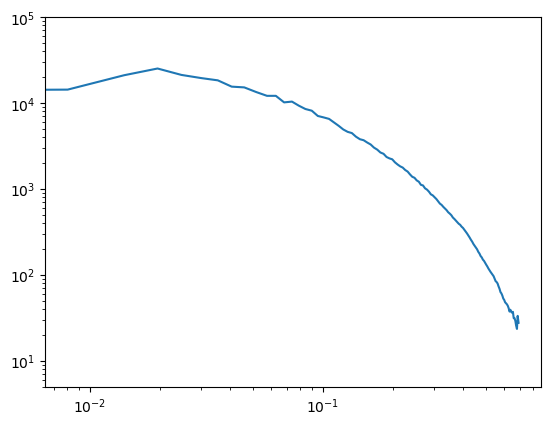

In [20]:
p_k_field, bins_field = get_power(np.load(train_set['Density_Field'][0]), 1000, bins=128)
plt.loglog(bins_field, p_k_field,label="Normal Field Power")
plt.ylim([5,10**5])

In [5]:
# a=[get_power(np.load(i), 1000, bins=128, bin_ave=False, log_bins=True) for i in fid_set['Density_Field']]
# a=np.array(a)

/tmp/ipykernel_190835/840575034.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  power[i]=mat[(rad<binlist[i+1])*(rad>=binlist[i])].mean()


(1e-08, 0.0001)

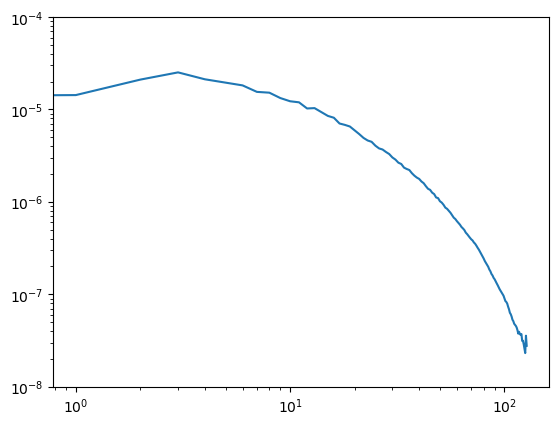

In [43]:
from scipy.fft import *

N = 128
delta = np.load(train_set['Density_Field'][0]) 
dft = fftshift(ifftn(delta))
freq = fftshift(fftfreq(128, 1000./128)) # h/Mpc
mat = np.multiply(dft,np.conjugate(dft))


# Raduis vector 3D 
rad = np.zeros([128,128,128])
for i in range(N):
    for j in range(N):
        for k in range(N):
            rad[i,j,k]=np.sqrt(freq[i]**2+freq[j]**2+freq[k]**2)

            
# Power Spectra            
bins=128
power = np.zeros(np.int0((N-1)/2))
binlist = np.linspace(rad.min(), rad.max(), bins+1)
power = np.zeros_like(binlist[:-1])
for i in np.arange(len(binlist[:-1])):
    power[i]=mat[(rad<binlist[i+1])*(rad>=binlist[i])].mean()

    
plt.loglog(power)
plt.ylim([10**(-8),10**-4])

In [4]:
use_gpu = torch.cuda.is_available()
net = InceptionV1_1D(aux_logits=False, num_classes=5)

# Models.Anirban_pk(params)
# InceptionV1_1D(aux_logits=False, num_classes=5)

# Models.Anirban4(params)
# print(net)
if use_gpu:
    print('GPU is avaialble!')
    net = net.cuda()

GPU is avaialble!


In [ ]:
detect_torch(net, params, train_set,val_set, test_set, val_exist=True, test_exist=True, batchsize=32, learning_rate=0.1, momentum=0.9,step_size=15, gamma=0.5, num_epochs=400,save_path=savepath, use_gpu= use_gpu, pretrained=False)

0.1
Train Batch Loss: -0.9066149473673687 
Train Batch Loss: 17.087805041291556 
Train Batch Loss: 35.18561767612418 
Train Batch Loss: 46.32792183091426 
Train Batch Loss: 44.13179121797669 
Train Batch Loss: 43.297938014640486 
Train Batch Loss: 37.328183710647224 
Train Batch Loss: 42.45648895165682 
Train Batch Loss: 41.05133913255034 
Train Batch Loss: 33.666129659727034 
Train Batch Loss: 37.46180740932949 
Train Batch Loss: 42.40726281763991 
Train Batch Loss: 41.62691591240291 
Train Batch Loss: 43.368988576929816 
Train Batch Loss: 40.38524831853237 
Train Batch Loss: 41.19199655223247 
Train Batch Loss: 42.745215565495954 
Train Batch Loss: 40.24610315131915 
Train Batch Loss: 43.509877715491044 
Train Batch Loss: 38.07539891554551 
Train Batch Loss: 38.98529694149175 
Train Batch Loss: 34.69272164299384 
Train Batch Loss: 36.46059206091898 
Train Batch Loss: 38.37023978904667 
Train Batch Loss: 40.84261186135156 
Train Batch Loss: 41.90195454107702 
Train Batch Loss: 40.1435

Train Batch Loss: 46.75767401251311 
Train Batch Loss: 37.967090835850875 
Train Batch Loss: 37.41580914669628 
Train Batch Loss: 41.812090138399434 
Train Batch Loss: 39.466380608482076 
Train Batch Loss: 40.41038669451232 
Train Batch Loss: 42.47054895203343 
Train Batch Loss: 39.75020459923256 
Train Batch Loss: 42.61927360188675 
Train Batch Loss: 38.113558362147735 
Train Batch Loss: 34.9870298689812 
Train Batch Loss: 39.79054577156867 
Train Batch Loss: 41.72000915276979 
Train Batch Loss: 37.31314963808093 
Train Batch Loss: 37.28039681440902 
Train Batch Loss: 38.93644087345834 
Train Batch Loss: 38.92029837319647 
Train Batch Loss: 38.722044400849356 
Train Batch Loss: 40.52156993909665 
Train Batch Loss: 35.352313691933404 
Train Batch Loss: 35.364175665888745 
Train Batch Loss: 39.33084815813094 
Train Batch Loss: 41.505553867145736 
Epoch 4 :     Train Loss = 38.9824108548863       Train Time 86.35275459289551  
Validation Batch Loss: 46.115531293694914 
Validation Batch L

Validation Batch Loss: 42.00915055013909 
Validation Batch Loss: 31.92413161424815 
Validation Batch Loss: 42.201512443289396 
Validation Batch Loss: 36.62463929203287 
Validation Batch Loss: 36.94918017541299 
Validation Batch Loss: 34.45829558828692 
Validation Batch Loss: 44.47216207828126 
Validation Batch Loss: 42.44023266853241 
Validation Batch Loss: 25.40372136982436 
Epoch 7 :    Validation Loss = 37.94206589693547   Validation Time = 9.46910810470581
0.1
Train Batch Loss: 35.60781418803699 
Train Batch Loss: 39.331343759003744 
Train Batch Loss: 34.140180282713466 
Train Batch Loss: 33.64892511663362 
Train Batch Loss: 36.14330545930059 
Train Batch Loss: 35.32307260614032 
Train Batch Loss: 33.52981427880822 
Train Batch Loss: 36.81907530289936 
Train Batch Loss: 37.84211752265449 
Train Batch Loss: 33.49158764070761 
Train Batch Loss: 32.964989868830834 
Train Batch Loss: 32.83096695452879 
Train Batch Loss: 32.452052829174214 
Train Batch Loss: 32.28039289435881 
Train Bat

Train Batch Loss: 16.17056513785347 
Train Batch Loss: 18.43945701873609 
Train Batch Loss: 16.960414105817726 
Train Batch Loss: 19.40871056260673 
Train Batch Loss: 19.40429901656798 
Train Batch Loss: 20.232179136137567 
Train Batch Loss: 15.170746686799548 
Train Batch Loss: 17.60948871753911 
Train Batch Loss: 17.866063610040914 
Train Batch Loss: 17.90057538123242 
Train Batch Loss: 17.967334774421417 
Train Batch Loss: 14.992093724249163 
Train Batch Loss: 15.497383493514823 
Train Batch Loss: 18.74155800013002 
Train Batch Loss: 16.54739507347737 
Train Batch Loss: 15.629075871726513 
Train Batch Loss: 16.10418767083181 
Train Batch Loss: 15.946463163387676 
Train Batch Loss: 16.827898386872537 
Train Batch Loss: 17.95805329322922 
Train Batch Loss: 16.71615714522588 
Train Batch Loss: 15.700498815255637 
Train Batch Loss: 20.463170894178404 
Train Batch Loss: 19.59514931830159 
Train Batch Loss: 19.161809802975476 
Train Batch Loss: 19.38130981166774 
Train Batch Loss: 18.6828

Train Batch Loss: 14.76832459551338 
Train Batch Loss: 13.7577215738438 
Train Batch Loss: 15.147186194187416 
Train Batch Loss: 14.919795738595907 
Train Batch Loss: 14.668277833620246 
Epoch 14 :     Train Loss = 14.566427318271105       Train Time 86.78869462013245  
Validation Batch Loss: 11.028214668629943 
Validation Batch Loss: 12.009591558525852 
Validation Batch Loss: 11.486884721580282 
Validation Batch Loss: 11.148097038702597 
Validation Batch Loss: 11.824106972429544 
Validation Batch Loss: 11.274291905858158 
Validation Batch Loss: 11.226560952557547 
Validation Batch Loss: 11.399817022450017 
Validation Batch Loss: 11.721420124237886 
Validation Batch Loss: 12.27405829419611 
Epoch 14 :    Validation Loss = 11.539304325916794   Validation Time = 9.062381982803345
0.1
Train Batch Loss: 14.320540883090624 
Train Batch Loss: 10.447905688083376 
Train Batch Loss: 13.353305778791757 
Train Batch Loss: 14.653510805196028 
Train Batch Loss: 14.759425024736018 
Train Batch Loss:

Train Batch Loss: 6.8987398477961275 
Train Batch Loss: 5.679124598443882 
Train Batch Loss: 5.671539041382549 
Train Batch Loss: 5.648277439246549 
Train Batch Loss: 9.184336504791267 
Train Batch Loss: 8.906392305188321 
Train Batch Loss: 9.091083327837163 
Train Batch Loss: 6.932762465195097 
Train Batch Loss: 7.186274016073861 
Train Batch Loss: 5.986236745359716 
Train Batch Loss: 7.358993011104712 
Train Batch Loss: 6.736604009474917 
Train Batch Loss: 6.997916942546583 
Train Batch Loss: 7.344407526243694 
Train Batch Loss: 8.59622409278319 
Train Batch Loss: 9.223289885327587 
Train Batch Loss: 8.7461677024779 
Train Batch Loss: 8.28303417332165 
Train Batch Loss: 6.878044286471617 
Train Batch Loss: 7.647003951263721 
Train Batch Loss: 6.3936698645188 
Train Batch Loss: 6.3161649351439575 
Train Batch Loss: 6.4719692549208485 
Train Batch Loss: 6.316091357328673 
Train Batch Loss: 4.757205460176065 
Train Batch Loss: 3.9510964895948226 
Train Batch Loss: 4.240294314029899 
Tra

Train Batch Loss: 3.8224758315966314 
Train Batch Loss: 2.9122136894390223 
Train Batch Loss: 6.192042855641217 
Train Batch Loss: 3.765530322723281 
Train Batch Loss: 3.4674578085167265 
Train Batch Loss: 1.2648152571913744 
Train Batch Loss: 3.2428147423720746 
Train Batch Loss: 4.8910426703078 
Train Batch Loss: 1.4603824469228566 
Train Batch Loss: 2.7844741002443025 
Epoch 21 :     Train Loss = 3.2517459100261226       Train Time 87.89917826652527  
Validation Batch Loss: 1.9631619121505257 
Validation Batch Loss: 1.576770667228027 
Validation Batch Loss: -0.3875982595373262 
Validation Batch Loss: 1.1449657796999375 
Validation Batch Loss: 0.7551812012685621 
Validation Batch Loss: 0.956285889351836 
Validation Batch Loss: 0.6159706923111452 
Validation Batch Loss: 1.2650843512610916 
Validation Batch Loss: 0.701046090379748 
Validation Batch Loss: -1.043426328099019 
Epoch 21 :    Validation Loss = 0.7547441996014528   Validation Time = 9.069065570831299
0.05
Train Batch Loss: 5

Train Batch Loss: 1.1055736032024637 
Train Batch Loss: 2.6537223756850303 
Train Batch Loss: -0.04159388312491136 
Train Batch Loss: 2.179398527956026 
Train Batch Loss: 3.6215507358407595 
Train Batch Loss: -0.15059871193274366 
Train Batch Loss: 0.2974667415197036 
Train Batch Loss: 3.1226932283713014 
Train Batch Loss: 1.5935641665176017 
Train Batch Loss: -0.6546661538370658 
Train Batch Loss: 1.9921674348141594 
Train Batch Loss: 2.524116033205371 
Train Batch Loss: 1.4068728979365068 
Train Batch Loss: -0.7461549915451626 
Train Batch Loss: -2.104331806837947 
Train Batch Loss: -0.32615665951326756 
Train Batch Loss: -0.8142735692053179 
Train Batch Loss: -1.3162195542661403 
Train Batch Loss: -0.7895822436905822 
Train Batch Loss: 0.5825046777351277 
Train Batch Loss: -0.9383504038038548 
Train Batch Loss: 0.31244579714047993 
Train Batch Loss: -2.378395364694157 
Train Batch Loss: -0.2101035641444502 
Train Batch Loss: 1.76773836689251 
Train Batch Loss: 1.197899427360808 
Tra

Train Batch Loss: -4.593017834383632 
Train Batch Loss: -0.6897888824952452 
Train Batch Loss: 1.6888478050014644 
Train Batch Loss: 0.30843061136231964 
Train Batch Loss: -1.2917532116948582 
Train Batch Loss: -0.22898052621932197 
Train Batch Loss: -3.650782709526613 
Train Batch Loss: 3.6779879496651198 
Train Batch Loss: 5.196569925135047 
Train Batch Loss: 4.895725072843922 
Train Batch Loss: 1.0831198142998422 
Train Batch Loss: 0.7901211595633055 
Train Batch Loss: 2.36827494456847 
Train Batch Loss: 1.9834030729061474 
Train Batch Loss: 2.014673886958243 
Train Batch Loss: 3.2621402024605324 
Train Batch Loss: 4.359234506589278 
Train Batch Loss: 5.30057117469011 
Train Batch Loss: 4.8328143883985275 
Train Batch Loss: 2.557724627570217 
Train Batch Loss: -0.14634029786725877 
Epoch 28 :     Train Loss = 0.4239754847678367       Train Time 89.344229221344  
Validation Batch Loss: 1.3844900609519062 
Validation Batch Loss: 1.139238616603677 
Validation Batch Loss: 0.702127724850

Validation Batch Loss: -7.298930724693668 
Validation Batch Loss: -7.020805650996383 
Validation Batch Loss: -6.884956176510119 
Validation Batch Loss: -7.198871668326944 
Validation Batch Loss: -7.058188176687579 
Validation Batch Loss: -7.472001125017145 
Epoch 31 :    Validation Loss = -7.197677308524338   Validation Time = 11.793859481811523
Model saved in file: /home/anirban/Quijote/Anirban/torch3d_0.001/Pk/InceptionV1_1D_log/
0.025
Train Batch Loss: -5.395690953243412 
Train Batch Loss: -5.565628336647504 
Train Batch Loss: -7.632642223456873 
Train Batch Loss: -7.0956289182192975 
Train Batch Loss: -5.447943601330898 
Train Batch Loss: -3.932338790691898 
Train Batch Loss: -5.4933506453715335 
Train Batch Loss: -9.61778328745533 
Train Batch Loss: -8.709650081639744 
Train Batch Loss: -7.119904871535607 
Train Batch Loss: -8.546128355313073 
Train Batch Loss: -9.709621303721931 
Train Batch Loss: -7.996997188995667 
Train Batch Loss: -6.483523051357016 
Train Batch Loss: -8.3559

Train Batch Loss: -9.980028750062154 
Train Batch Loss: -9.442371350389061 
Train Batch Loss: -9.818115309226396 
Train Batch Loss: -9.55839902291384 
Train Batch Loss: -8.634468909784838 
Train Batch Loss: -10.893295147799357 
Train Batch Loss: -7.99466495782621 
Train Batch Loss: -8.506314883505844 
Train Batch Loss: -7.71618237589785 
Train Batch Loss: -10.28542643760705 
Train Batch Loss: -7.034504132501217 
Train Batch Loss: -7.320011438409317 
Train Batch Loss: -5.951610291963385 
Train Batch Loss: -7.586544027646523 
Train Batch Loss: -7.598980161553024 
Train Batch Loss: -10.255649125199024 
Train Batch Loss: -9.768210102496942 
Train Batch Loss: -10.142594952953747 
Train Batch Loss: -10.228978438485195 
Train Batch Loss: -8.523690517177133 
Train Batch Loss: -6.704516362130836 
Train Batch Loss: -8.17911877311658 
Train Batch Loss: -8.746167971097114 
Train Batch Loss: -8.092189456036142 
Train Batch Loss: -5.739589719081774 
Train Batch Loss: -5.29321214880394 
Train Batch L

Train Batch Loss: -9.361039113673748 
Train Batch Loss: -9.66329398166949 
Train Batch Loss: -9.692276803537675 
Train Batch Loss: -11.449531683222146 
Train Batch Loss: -11.390372054965146 
Train Batch Loss: -11.236867861858586 
Train Batch Loss: -12.818502400278446 
Train Batch Loss: -10.677432070215147 
Train Batch Loss: -9.97990447670118 
Train Batch Loss: -11.618655999656651 
Train Batch Loss: -11.912434545605004 
Train Batch Loss: -9.62313269078547 
Train Batch Loss: -10.141762497001002 
Train Batch Loss: -13.104750245437858 
Epoch 38 :     Train Loss = -10.702851713027568       Train Time 91.10789966583252  
Validation Batch Loss: -15.505213256921884 
Validation Batch Loss: -15.633436663689759 
Validation Batch Loss: -15.823533595925586 
Validation Batch Loss: -15.584034818577289 
Validation Batch Loss: -16.776541637622604 
Validation Batch Loss: -16.715245295808046 
Validation Batch Loss: -15.765781063869259 
Validation Batch Loss: -15.762926784682808 
Validation Batch Loss: -1

Validation Batch Loss: -17.06532007720806 
Validation Batch Loss: -17.86024249731814 
Validation Batch Loss: -16.49376411855661 
Validation Batch Loss: -16.89670610667188 
Validation Batch Loss: -15.993144873354844 
Validation Batch Loss: -17.268099780510948 
Validation Batch Loss: -18.447169638917412 
Epoch 41 :    Validation Loss = -17.10424867309786   Validation Time = 10.281047105789185
Model saved in file: /home/anirban/Quijote/Anirban/torch3d_0.001/Pk/InceptionV1_1D_log/
0.025
Train Batch Loss: -14.004358338868336 
Train Batch Loss: -11.949003218488114 
Train Batch Loss: -11.102400539989993 
Train Batch Loss: -12.499311632733384 
Train Batch Loss: -15.323115292298667 
Train Batch Loss: -12.32076266277753 
Train Batch Loss: -11.604582345664085 
Train Batch Loss: -12.801708968984107 
Train Batch Loss: -12.50050697753225 
Train Batch Loss: -12.519573716874614 
Train Batch Loss: -10.589426621199099 
Train Batch Loss: -9.236387478396285 
Train Batch Loss: -12.679214347621889 
Train Ba

Train Batch Loss: -13.459755938292519 
Train Batch Loss: -13.39355026931921 
Train Batch Loss: -11.924296781510964 
Train Batch Loss: -11.989965959309934 
Train Batch Loss: -16.733651582976716 
Train Batch Loss: -15.822305555598621 
Train Batch Loss: -14.729279690242004 
Train Batch Loss: -14.931590088812706 
Train Batch Loss: -14.580533316467651 
Train Batch Loss: -13.535182602180516 
Train Batch Loss: -11.241998434440426 
Train Batch Loss: -13.454583822421373 
Train Batch Loss: -14.207158335585781 
Train Batch Loss: -13.395737727272447 
Train Batch Loss: -14.017266682557475 
Train Batch Loss: -12.700453608876673 
Train Batch Loss: -9.854807217080166 
Train Batch Loss: -10.871415623949837 
Train Batch Loss: -12.254996641514483 
Train Batch Loss: -9.837061187039494 
Train Batch Loss: -13.430024235050436 
Train Batch Loss: -11.608549452527027 
Train Batch Loss: -9.062667318390833 
Train Batch Loss: -9.84261555040701 
Train Batch Loss: -12.82056357513763 
Train Batch Loss: -9.08113432125

This is for test data
MSE loss: 0.004652618690235244 


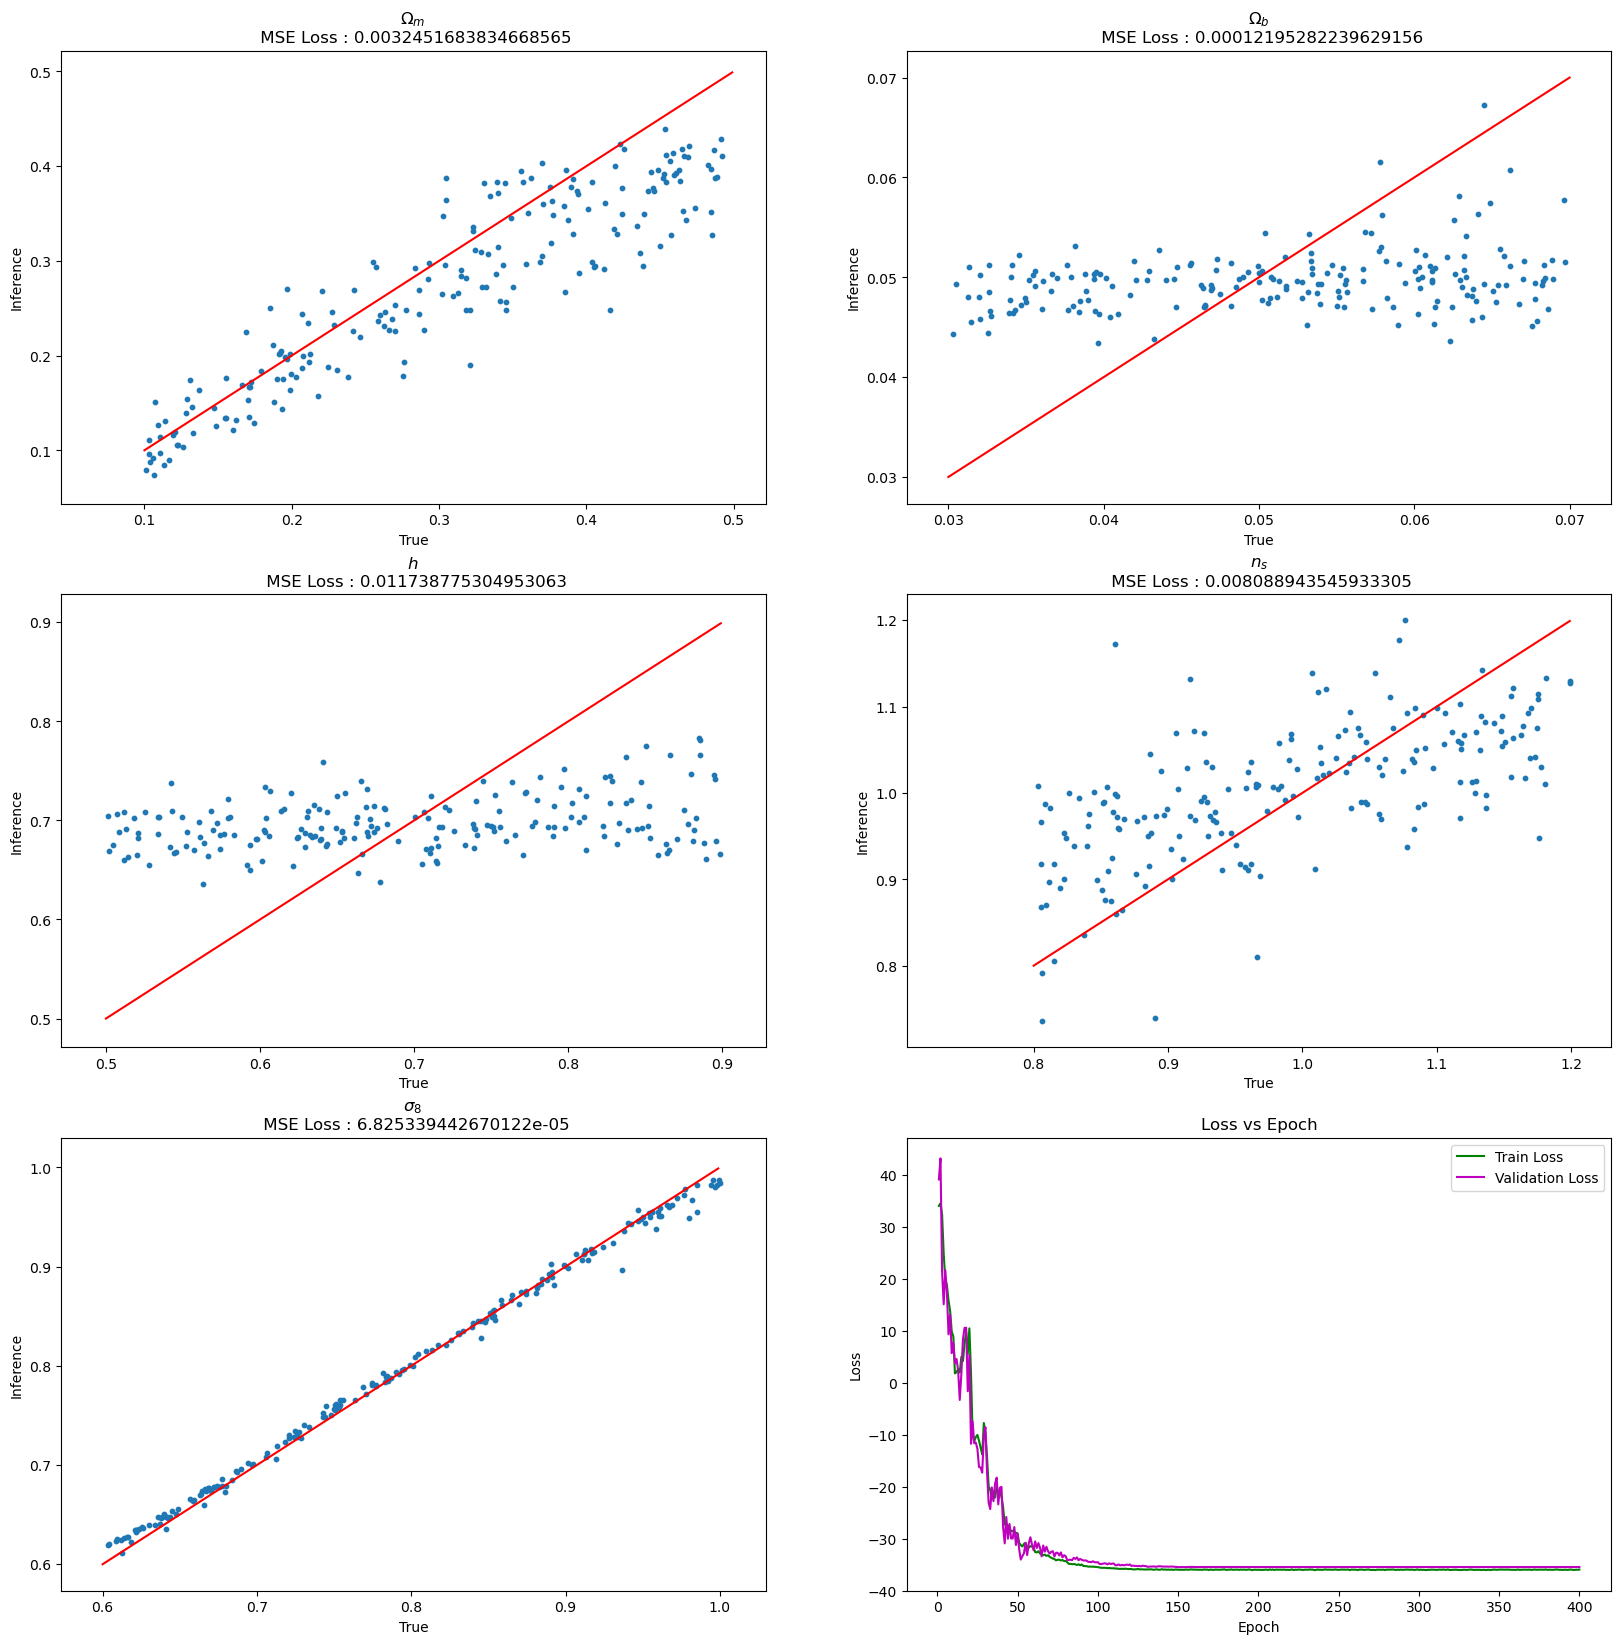

In [8]:
# 128 k=2
out, _ = comparison_plot(test_set,'test', parameters=params, method=preprocess.PK_log, save_path=savepath, plot=True, save_fig=True)

This is for test data
MSE loss: 0.0024833934986754156 


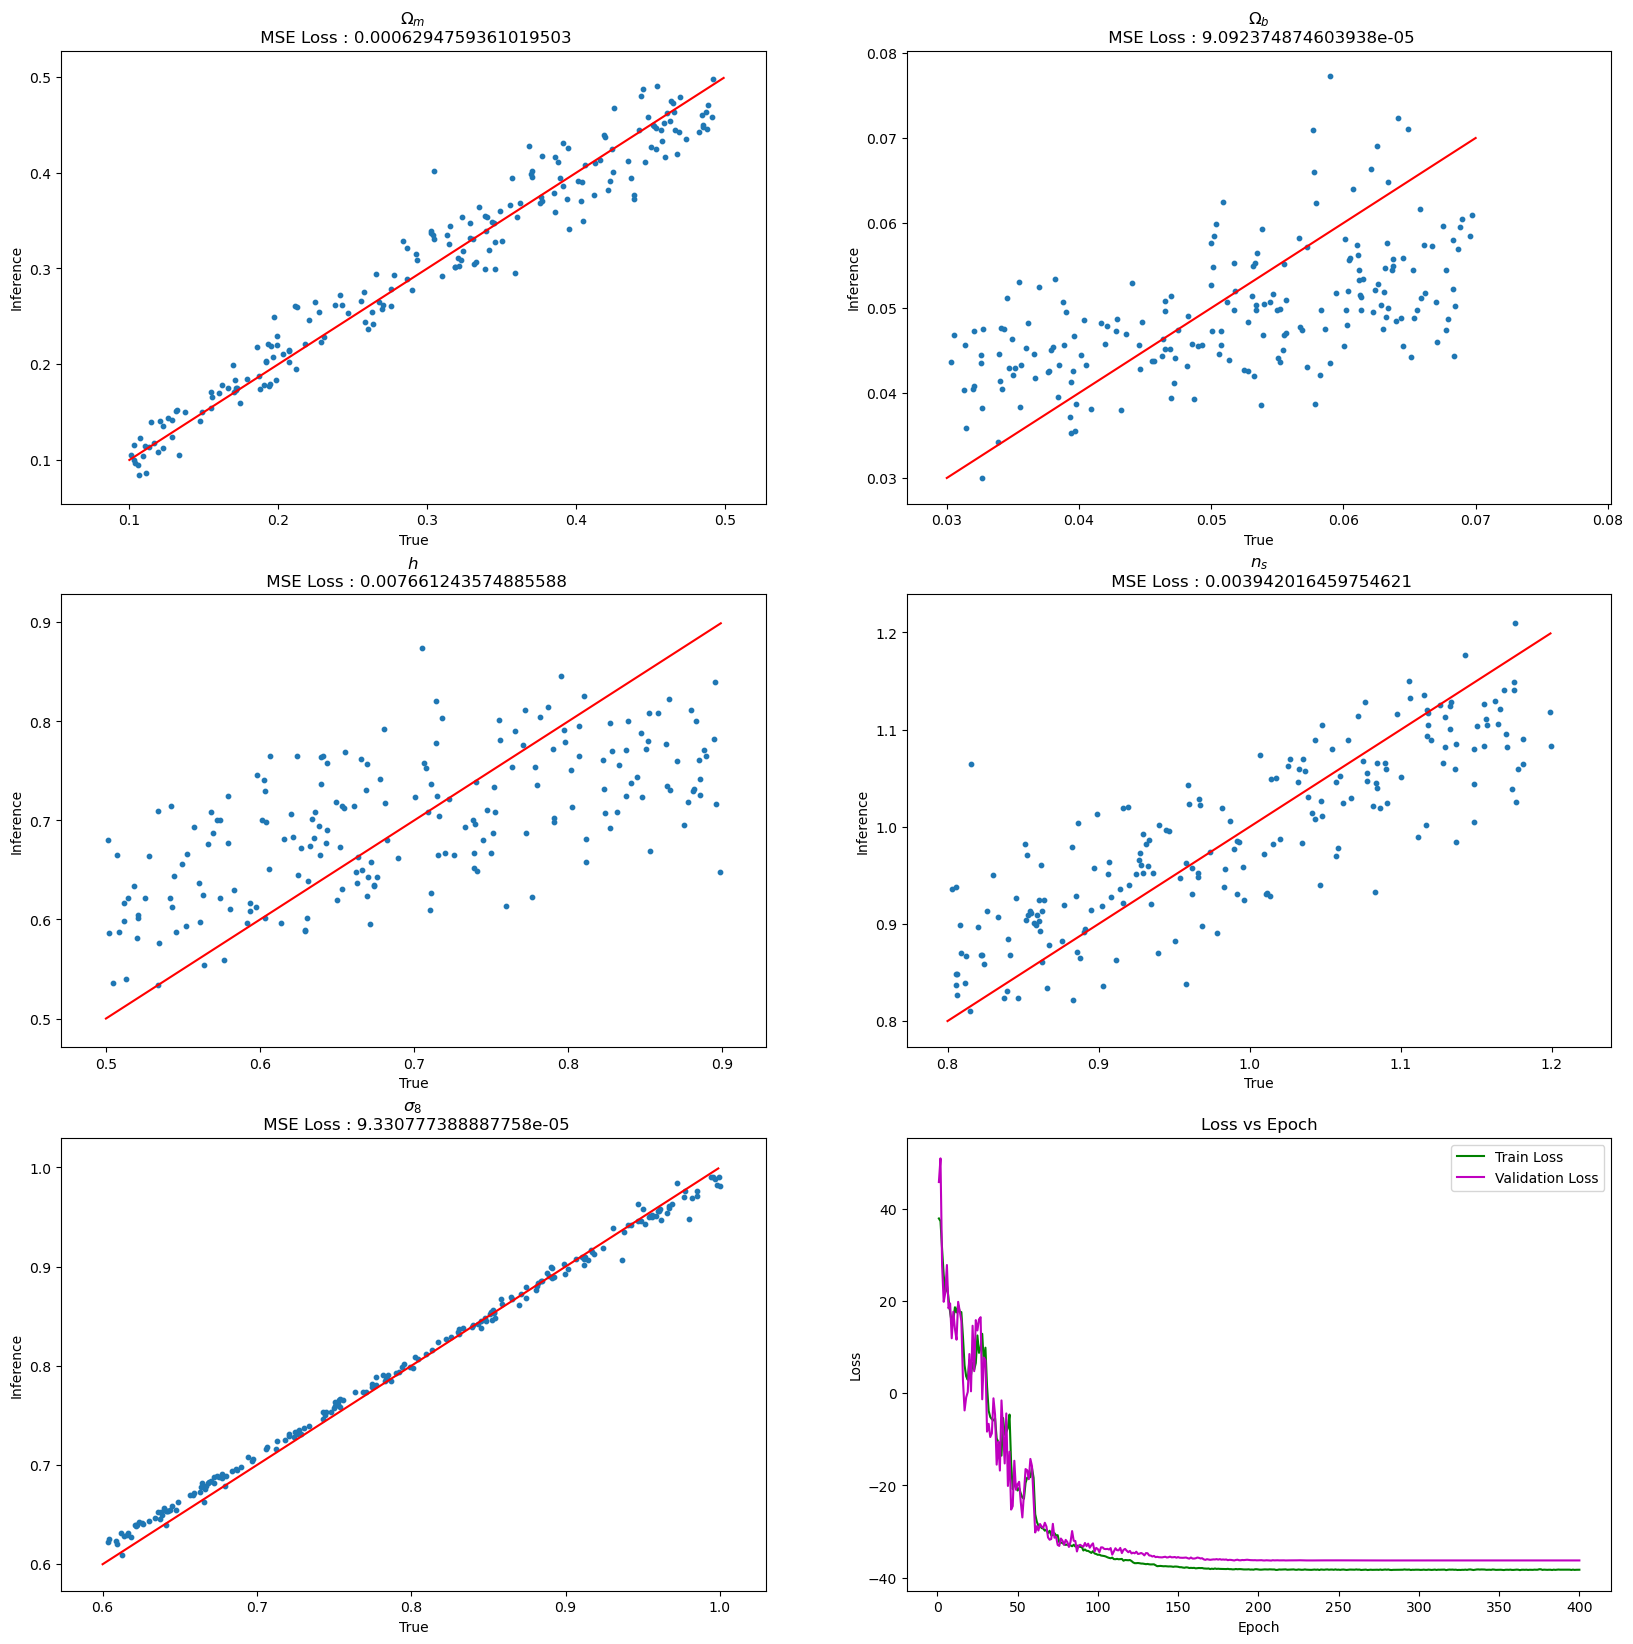

In [6]:
# k=2 64
out, _ = comparison_plot(test_set,'test', parameters=params, method=preprocess.PK_log, save_path=savepath, plot=True, save_fig=True)

This is for test data
MSE loss: 0.002698817025257165 


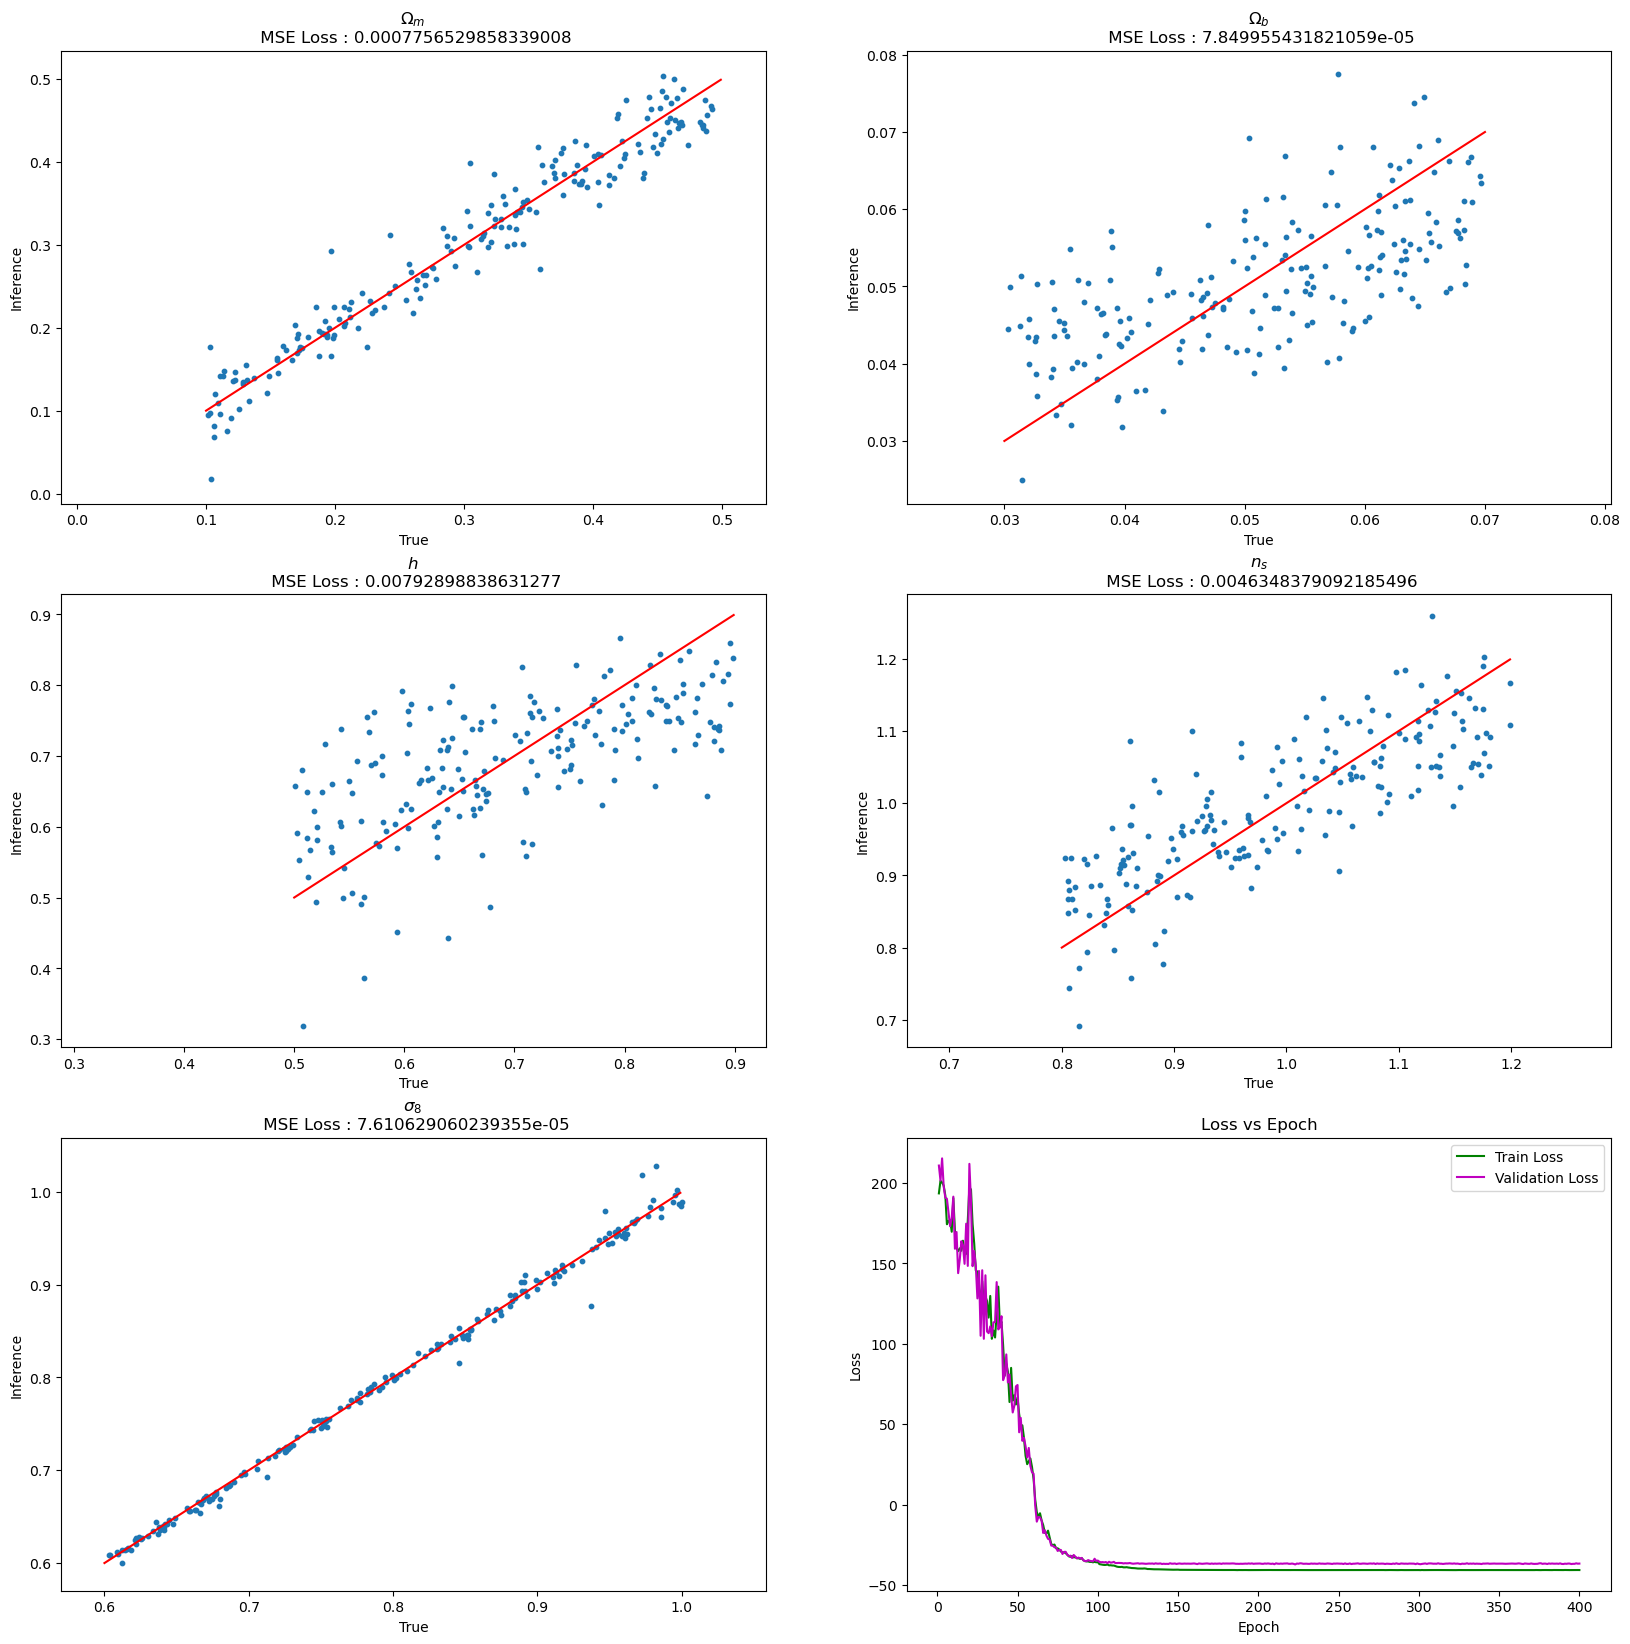

In [6]:
out, _ = comparison_plot(test_set,'test', parameters=params, method=preprocess.PK_log, save_path=savepath, plot=True, save_fig=True)

This is for test data
MSE loss: 0.0038521444261984217 


(tensor([[0.4248, 0.0536, 0.6469, 0.9305, 0.7884],
         [0.3718, 0.0480, 0.6578, 0.9392, 0.8693],
         [0.2812, 0.0459, 0.7118, 0.9661, 0.6555],
         [0.3022, 0.0595, 0.6242, 1.0192, 0.6722],
         [0.3622, 0.0469, 0.7562, 1.1439, 0.9432],
         [0.4385, 0.0554, 0.7518, 1.0597, 0.7654],
         [0.2371, 0.0514, 0.7067, 1.0386, 0.6657],
         [0.2168, 0.0508, 0.7483, 1.0334, 0.6165],
         [0.4937, 0.0579, 0.8076, 1.1833, 0.9901],
         [0.4346, 0.0460, 0.7337, 0.9710, 0.8179],
         [0.3979, 0.0539, 0.6418, 1.0617, 0.9302],
         [0.2459, 0.0493, 0.7001, 0.9772, 0.7110],
         [0.3207, 0.0561, 0.6562, 0.9976, 0.6263],
         [0.0659, 0.0441, 0.7628, 1.0814, 0.8984],
         [0.3330, 0.0494, 0.7514, 0.9145, 0.8876],
         [0.3302, 0.0415, 0.7524, 0.8842, 0.8913],
         [0.0370, 0.0481, 0.8215, 1.0949, 0.6210],
         [0.2690, 0.0433, 0.6808, 1.0169, 0.8265],
         [0.1050, 0.0485, 0.7133, 1.0160, 0.6434],
         [0.3080, 0.0496, 0.723

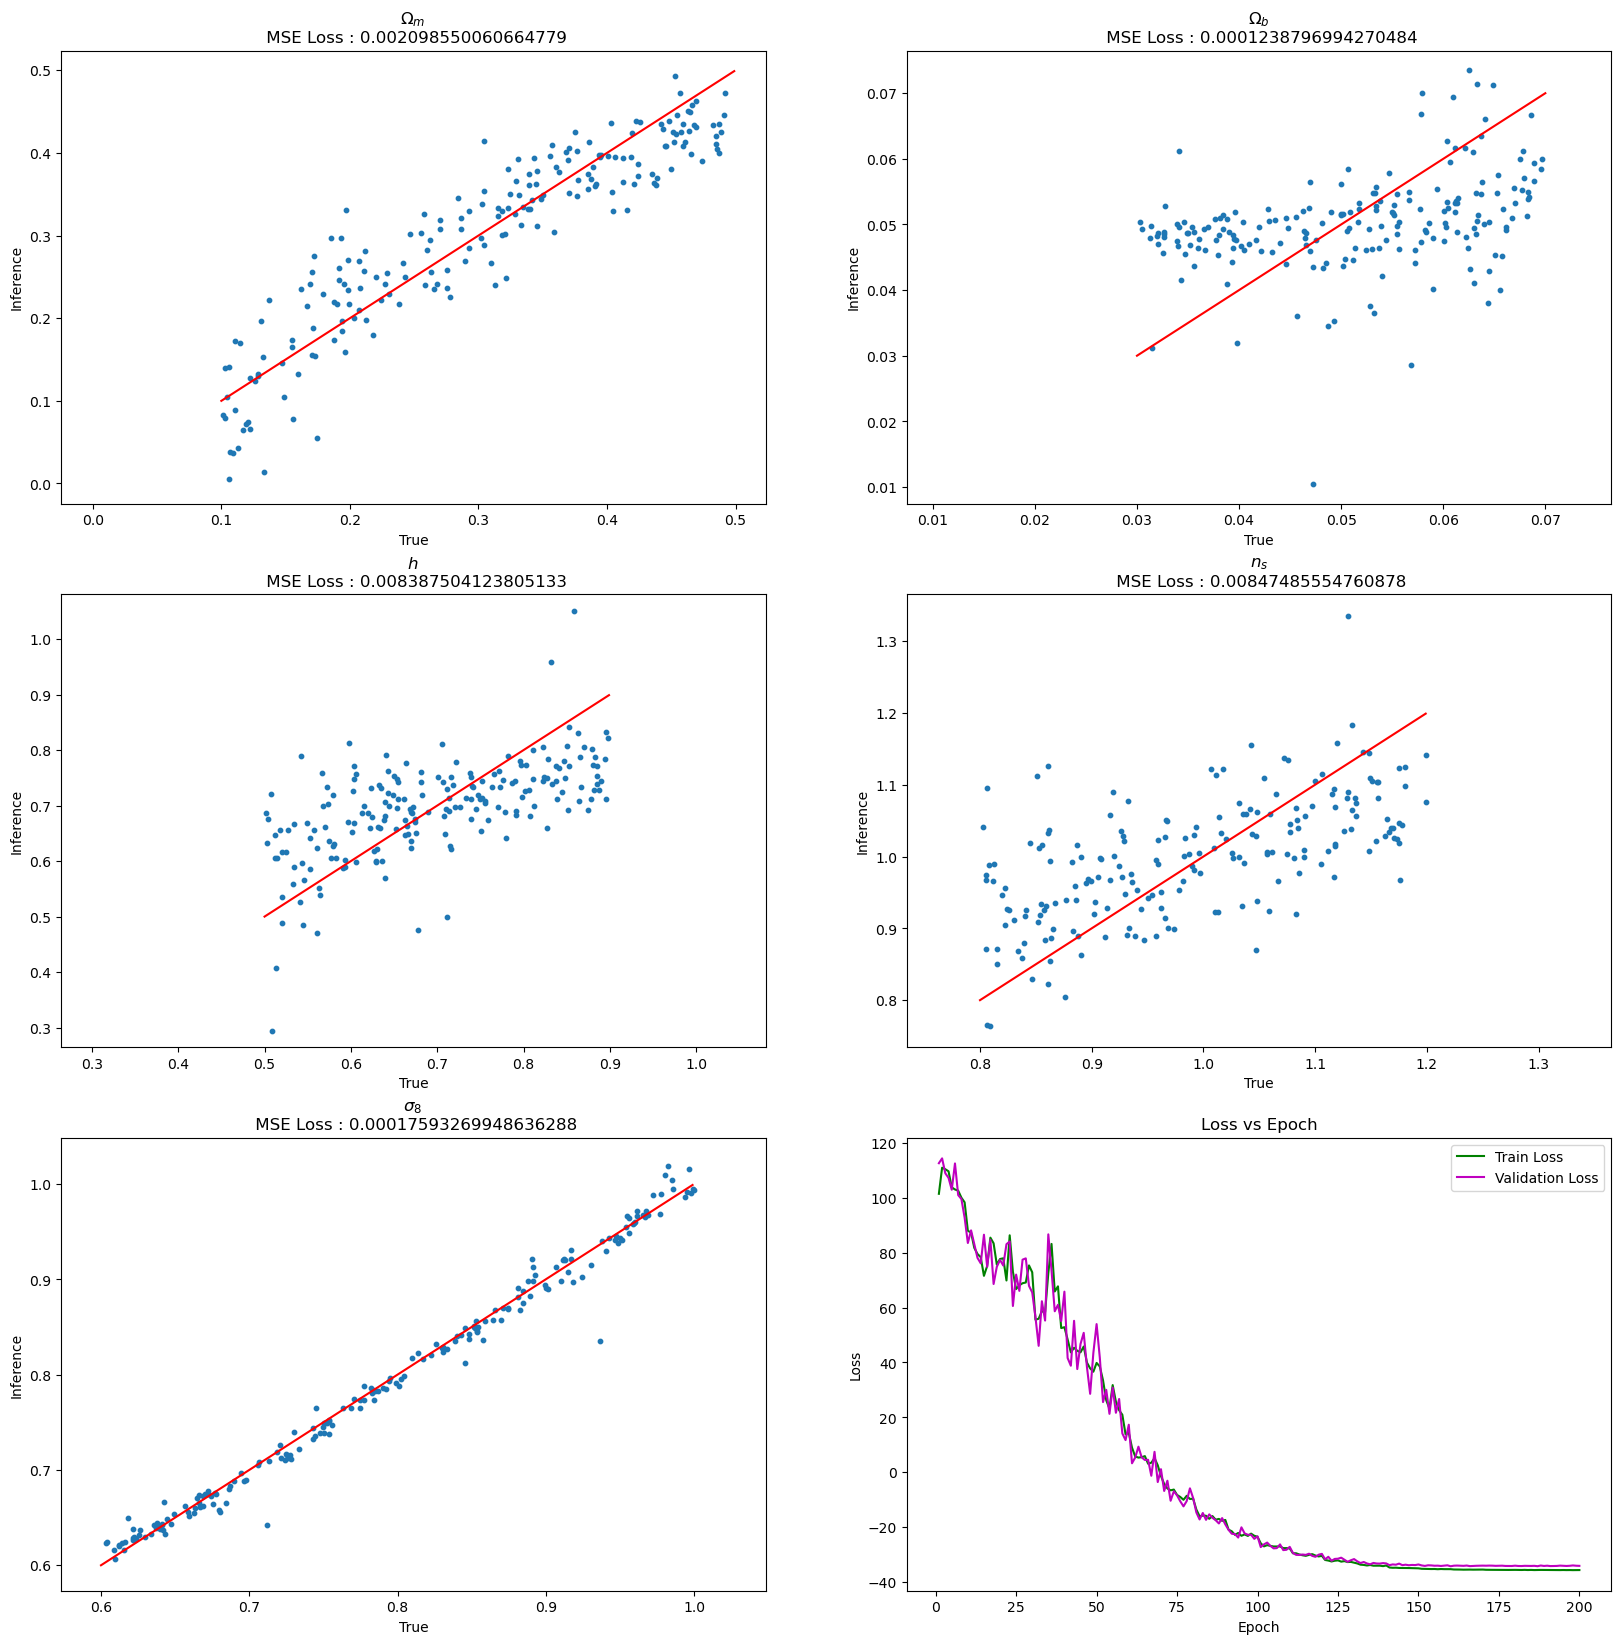

In [131]:
comparison_plot(modelpath,test_set,'test',save_path=savepath)

This is for test data
MSE loss: 0.0027876760436609223 


(tensor([[0.4416, 0.0539, 0.6506, 0.9669, 0.7974],
         [0.3970, 0.0408, 0.6950, 0.8786, 0.8765],
         [0.2135, 0.0417, 0.7473, 0.9891, 0.6610],
         [0.2546, 0.0626, 0.6803, 1.1209, 0.6716],
         [0.3901, 0.0429, 0.7676, 1.0446, 0.9473],
         [0.4345, 0.0482, 0.7525, 1.0764, 0.7779],
         [0.1977, 0.0531, 0.7397, 1.1112, 0.6846],
         [0.1994, 0.0525, 0.6995, 1.0370, 0.6139],
         [0.4721, 0.0516, 0.7608, 1.1311, 0.9879],
         [0.4678, 0.0455, 0.6857, 0.9314, 0.8154],
         [0.4096, 0.0508, 0.7168, 1.0455, 0.9468],
         [0.2005, 0.0502, 0.7347, 1.0600, 0.7302],
         [0.2975, 0.0585, 0.6442, 1.0059, 0.6250],
         [0.1296, 0.0502, 0.7533, 1.0586, 0.8921],
         [0.3513, 0.0516, 0.6822, 0.9758, 0.8877],
         [0.2838, 0.0436, 0.7192, 0.9379, 0.8780],
         [0.1112, 0.0440, 0.6609, 0.8291, 0.6126],
         [0.2364, 0.0501, 0.7418, 1.0884, 0.8376],
         [0.1500, 0.0412, 0.6926, 0.8615, 0.6538],
         [0.3397, 0.0512, 0.664

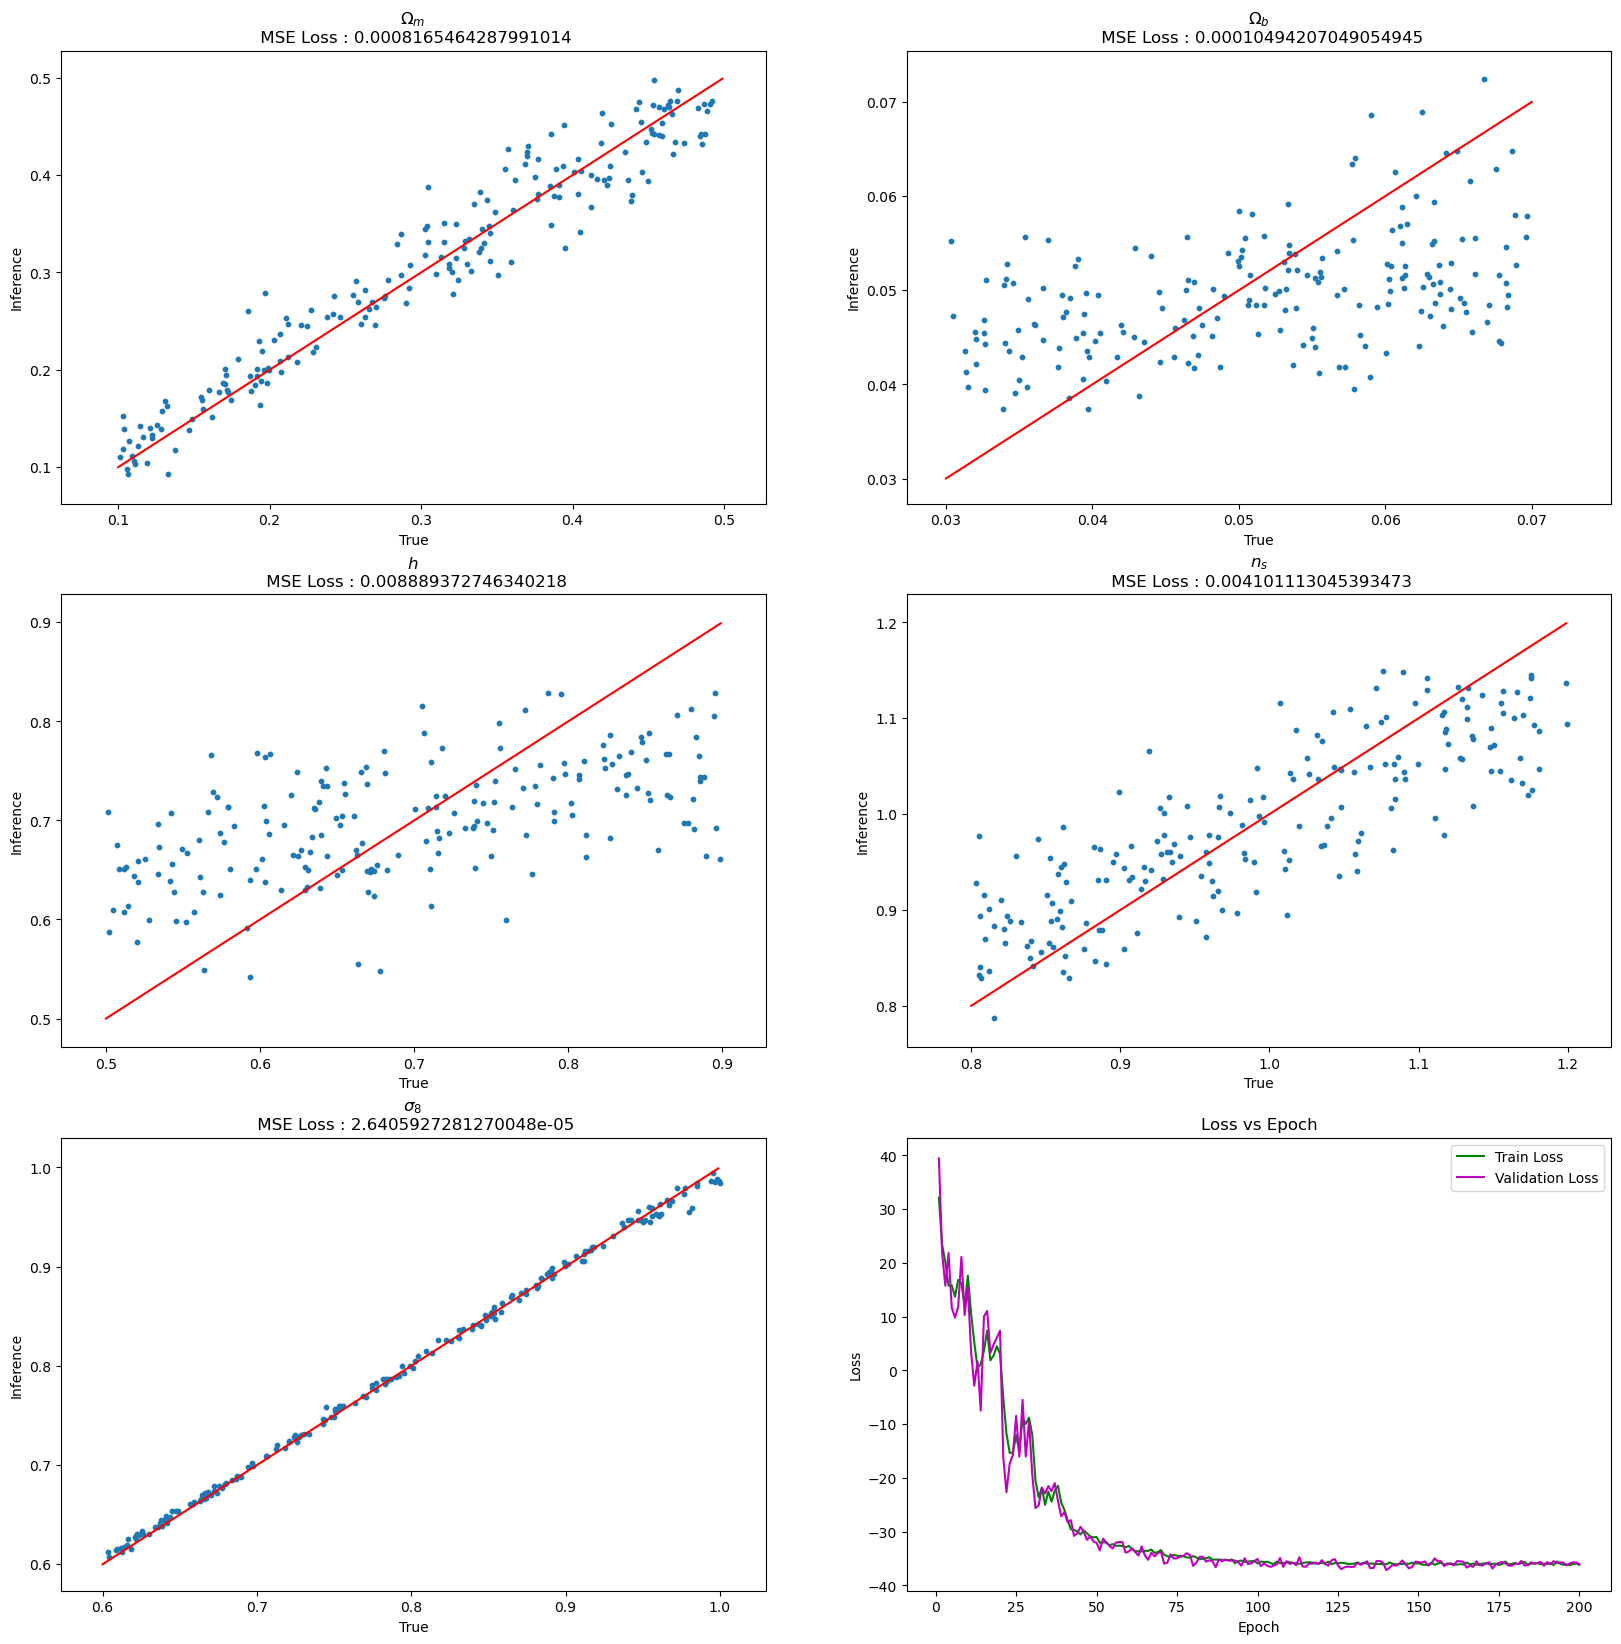

In [20]:
comparison_plot(modelpath,test_set,'test',save_path=savepath)

/home/anirban/Quijote/Anirban/funcs.py:335: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  img = torch.Tensor(img)


This is for test data
MSE loss: 0.0027873422935687712 


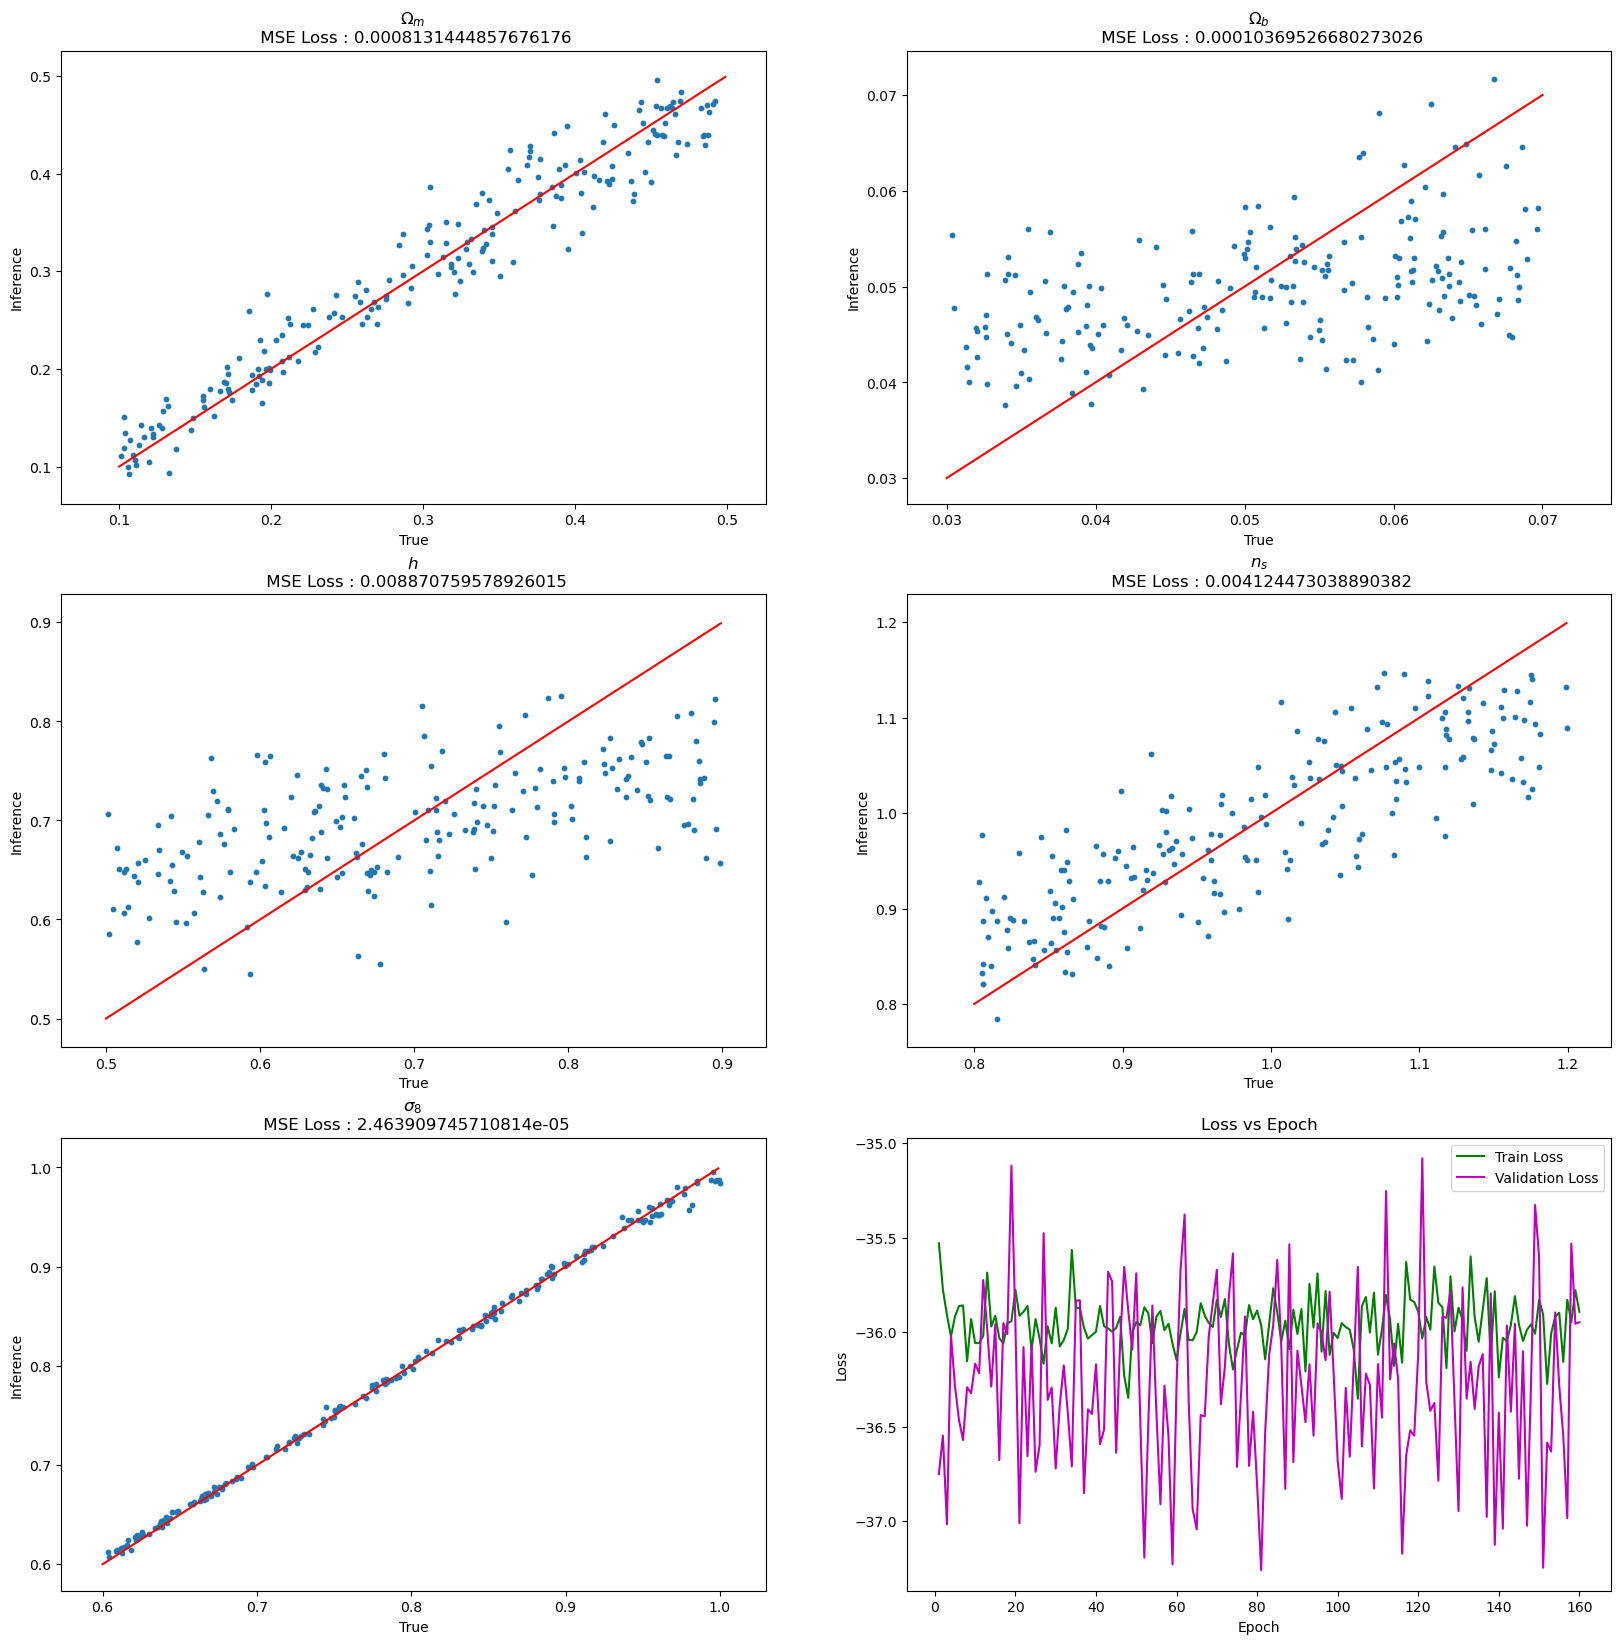

In [5]:
out, _ = comparison_plot(test_set,'test', parameters=params, method=preprocess.PK_log, save_path=savepath, plot=True, save_fig=False)

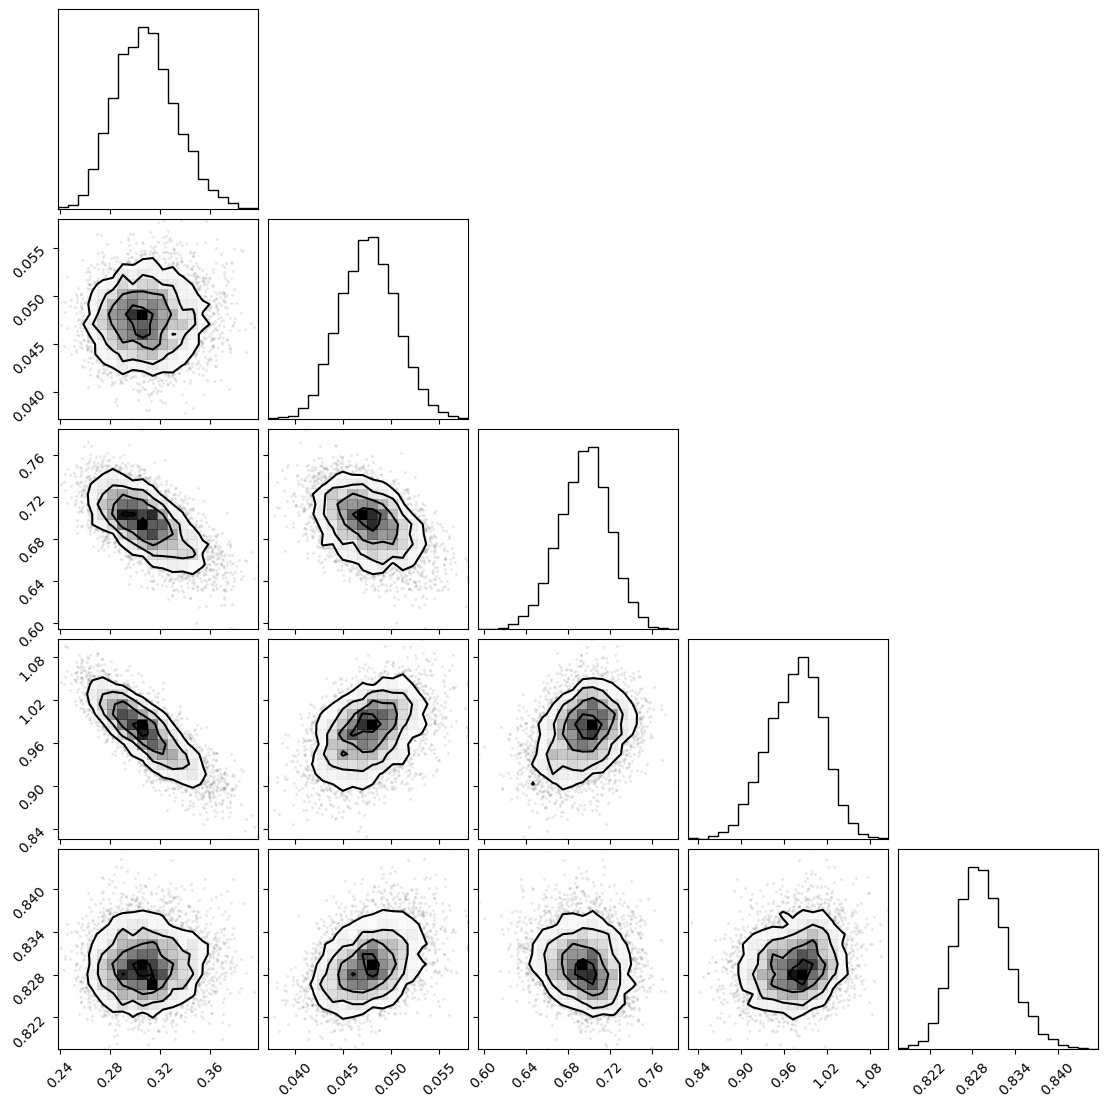

In [12]:
corner.corner(out.numpy())
plt.savefig(savepath+'corner.pdf')

This is for fid data
MSE loss: 0.0003165687781040006 


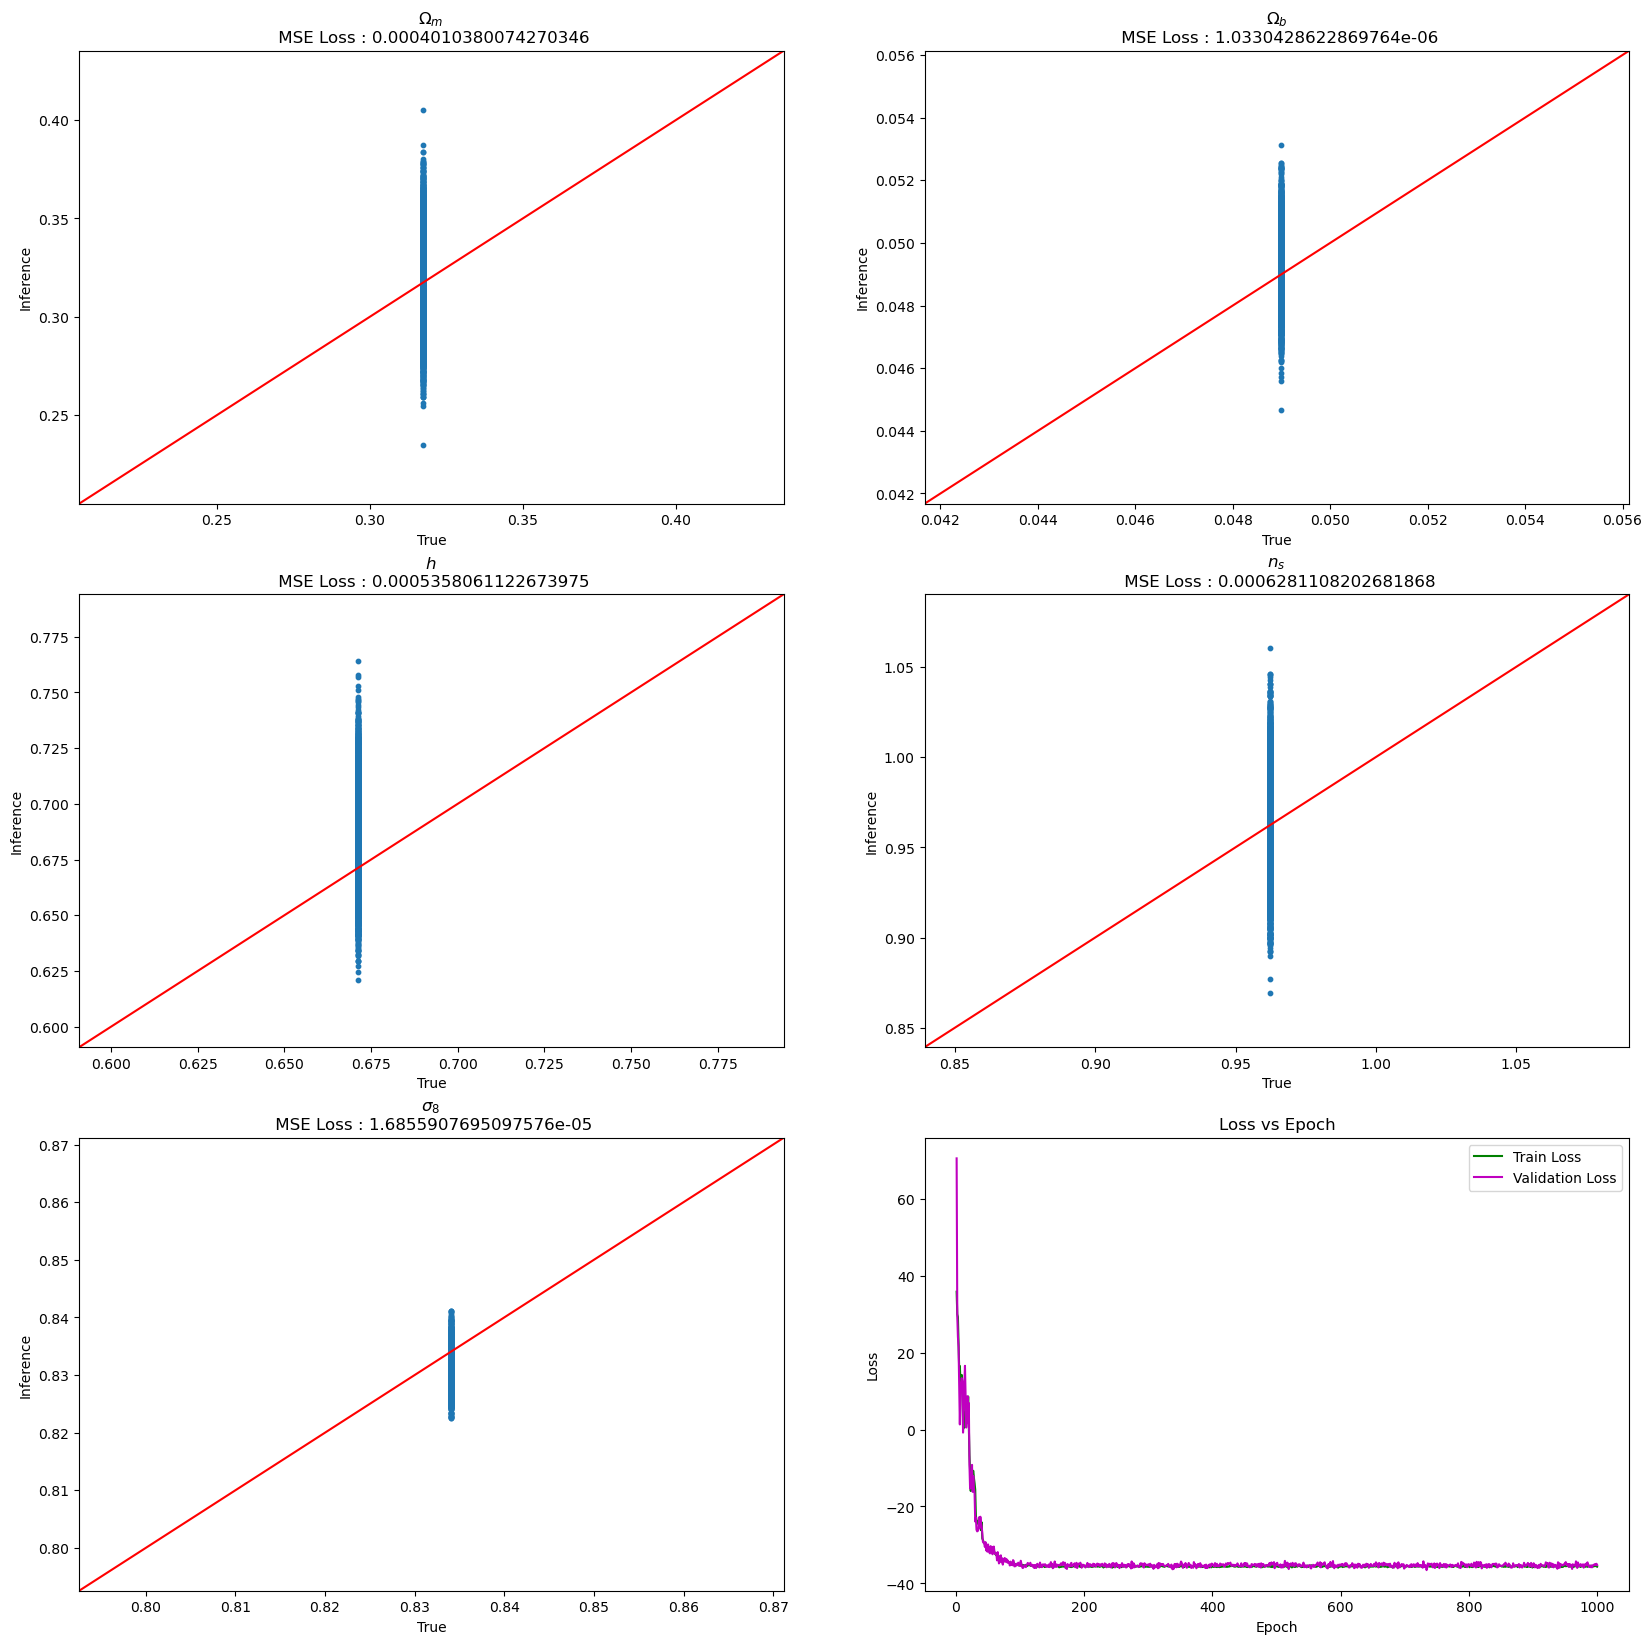

In [5]:
out, _ = comparison_plot(fid_set,'fid', parameters=params, method=preprocess.PK_log, save_path=savepath, plot=True, save_fig=False)

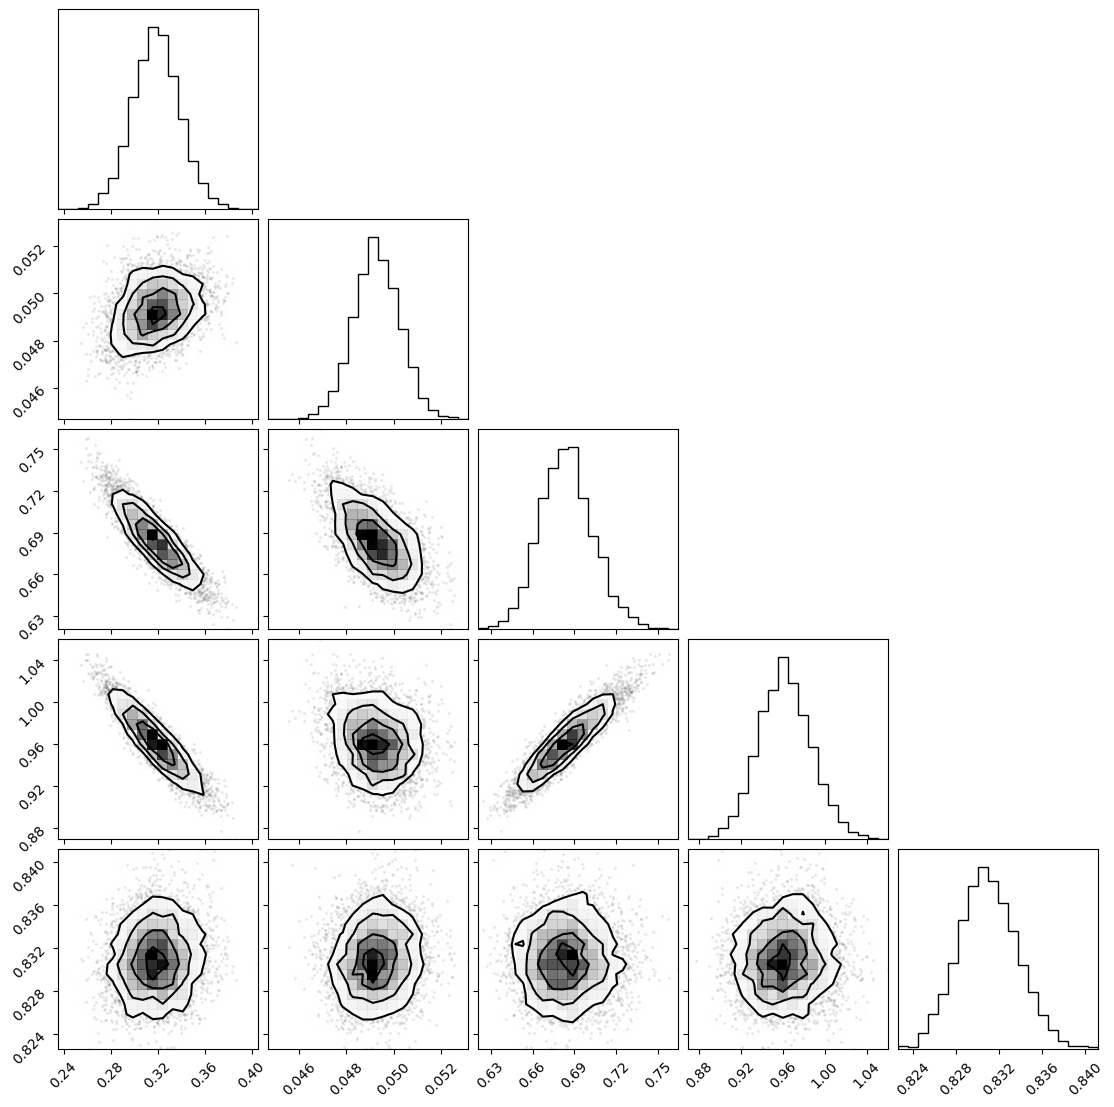

In [6]:
corner.corner(out.numpy())
plt.savefig(savepath+'corner.pdf')

In [7]:
C=cov(out)

In [8]:
deriv_T=del_mu(parameters=params, process_list=[preprocess.PK_log], save_path=savepath)

In [9]:
deriv_T

array([[ 7.0710182e-01, -1.7786771e-02,  3.9126873e-01,  4.4480264e-01,
         1.9764900e-02],
       [-4.6941635e-01,  2.5048479e-01, -3.7726758e+00, -2.9115078e+00,
        -5.2839514e-02],
       [ 6.7068636e-02, -1.5756581e-02,  3.6046654e-01,  3.9004982e-01,
         7.1257353e-03],
       [ 9.3391538e-02, -8.1873499e-03,  3.7569404e-01,  5.1828027e-01,
         2.1189451e-03],
       [-6.6608191e-03,  2.5540343e-02, -9.2609726e-02,  1.1041363e-01,
         9.8000765e-01]], dtype=float32)

In [13]:
np.matmul(np.matmul(deriv_T,np.linalg.inv(C)),np.transpose(deriv_T))

array([[ 9.5373545e+03, -2.5972434e+04,  2.7454666e+03,  3.5872690e+03,
         2.3621213e+03],
       [-2.5972438e+04,  1.5809642e+05, -1.2959437e+04, -1.2413007e+04,
         7.0830898e+03],
       [ 2.7454663e+03, -1.2959436e+04,  1.2209542e+03,  1.3346022e+03,
        -4.1564163e+01],
       [ 3.5872693e+03, -1.2413008e+04,  1.3346022e+03,  1.6767363e+03,
         2.4503889e+01],
       [ 2.3621213e+03,  7.0830898e+03, -4.1564194e+01,  2.4503782e+01,
         4.0823250e+04]], dtype=float32)

In [14]:
FisherMatrix(fid_set, 'fid', parameters=params, process_list=[preprocess.PK_log], save_path=savepath)

array([[ 9.5373545e+03, -2.5972434e+04,  2.7454666e+03,  3.5872690e+03,
         2.3621213e+03],
       [-2.5972438e+04,  1.5809642e+05, -1.2959437e+04, -1.2413007e+04,
         7.0830898e+03],
       [ 2.7454663e+03, -1.2959436e+04,  1.2209542e+03,  1.3346022e+03,
        -4.1564163e+01],
       [ 3.5872693e+03, -1.2413008e+04,  1.3346022e+03,  1.6767363e+03,
         2.4503889e+01],
       [ 2.3621213e+03,  7.0830898e+03, -4.1564194e+01,  2.4503782e+01,
         4.0823250e+04]], dtype=float32)

In [21]:
def comparison_plot(model_path,data,datafile,method=preprocess.PK_log,plot=True,save_path=""):
    criterion = nn.MSELoss()

        # Load the graph with the trained states
    model=torch.load(model_path)['model']
    model.load_state_dict(torch.load(model_path)['state_dict'])


    with torch.no_grad():
        model.eval()
        
        inputs, labels = method(data['Density_Field'], data[params])
#         print(inputs)
        
        use_gpu = torch.cuda.is_available()
        if use_gpu:
            inputs, labels = inputs.cuda(),labels.cuda() 
            output=torch.Tensor().cuda()
            
        else:
            model=model.cpu()
            output=torch.Tensor()
        
    
        loss=0
        m=16
    
        if len(inputs)>m:
            
            num_complete_minibatches=math.floor(len(inputs)/m)
            for i in range(num_complete_minibatches):
                output=torch.cat((output,model(inputs[i*m:(i+1)*m])),0)
                loss_i = criterion(output[i*m:(i+1)*m],labels[i*m:(i+1)*m]).item()
                loss+=loss_i*m
                torch.cuda.empty_cache()

                

            if len(inputs)%m!=0:
                output=torch.cat((output,model(inputs[num_complete_minibatches*m:])),0)
                loss_i = criterion(output[num_complete_minibatches*m:],labels[num_complete_minibatches*m:]).item()
                loss+=loss_i*(len(inputs)%m)
                
                

            loss=loss/len(inputs)

            
            
            
            
    
        else:        
    
            output = model(inputs)
            loss = criterion(output,labels).item()
            

    output=output.cpu()
    labels=labels.cpu()
        
    

        
    if plot:
        
        figure, axis = plt.subplots(5,figsize=(10,50))
        print("This is for {} data" .format(datafile))
        print("MSE loss: {} " .format(loss))

        axis[0].scatter(labels[:,0],output[:,0])
        axis[0].set_xlabel('True')
        axis[0].set_ylabel('Inference')
#         axis[0].set_xlim([0.02,0.08])
#         axis[0].set_ylim([0.02,0.08])
        axis[0].set_title("MSE Loss : {}         \n\n" .format(criterion(output[:,0],labels[:,0]).item()))
        axis[0].set_rasterized(True)

        axis[1].scatter(labels[:,1],output[:,1])
        axis[1].set_xlabel('True')
        axis[1].set_ylabel('Inference')
        axis[1].set_title("MSE Loss : {}          \n\n" .format(criterion(output[:,1],labels[:,1]).item()))
        axis[1].set_rasterized(True)

        axis[2].scatter(labels[:,2],output[:,2])
        axis[2].set_xlabel('True')
        axis[2].set_ylabel('Inference')
        axis[2].set_title("MSE Loss : {}          \n\n" .format(criterion(output[:,2],labels[:,2]).item()))
        axis[2].set_rasterized(True)


        axis[3].scatter(labels[:,3],output[:,3])
        axis[3].set_xlabel('True')
        axis[3].set_ylabel('Inference')
        axis[3].set_title("MSE Loss : {}          \n\n" .format(criterion(output[:,3],labels[:,3]).item()))
        axis[3].set_rasterized(True)


        axis[4].scatter(labels[:,4],output[:,4])
        axis[4].set_xlabel('True')
        axis[4].set_ylabel('Inference')
        axis[4].set_title("MSE Loss : {}          \n\n" .format(criterion(output[:,4],labels[:,4]).item()))
        axis[4].set_rasterized(True)
        
        
        plt.savefig(save_path+"comparison_"+datafile+".pdf",dpi=600)

    return output, labels


This is for test data
MSE loss: 84091547.00665538 


(tensor([[ 8.6031e+02, -3.9474e+02,  9.6642e+02, -3.7311e+02,  5.6154e+02],
         [ 9.9331e+02, -4.4715e+02,  1.1141e+03, -4.1217e+02,  6.4672e+02],
         [ 1.6441e+03, -7.7156e+02,  1.8517e+03, -7.5536e+02,  1.0773e+03],
         [ 1.7167e+03, -8.0460e+02,  1.9333e+03, -7.8693e+02,  1.1247e+03],
         [ 7.1044e+02, -3.1665e+02,  7.9638e+02, -2.8819e+02,  4.6119e+02],
         [ 3.5556e+02, -1.6213e+02,  3.9951e+02, -1.4111e+02,  2.3535e+02],
         [ 1.5210e+03, -7.1115e+02,  1.7120e+03, -6.9074e+02,  9.9644e+02],
         [ 2.5524e+03, -1.2025e+03,  2.8768e+03, -1.1837e+03,  1.6732e+03],
         [ 4.5212e+02, -1.9508e+02,  5.0528e+02, -1.6253e+02,  2.9564e+02],
         [ 5.4987e+02, -2.4960e+02,  6.1754e+02, -2.2852e+02,  3.5907e+02],
         [ 8.1609e+02, -3.6276e+02,  9.1440e+02, -3.3488e+02,  5.2807e+02],
         [ 2.3941e+03, -1.1199e+03,  2.6960e+03, -1.0999e+03,  1.5665e+03],
         [ 1.0958e+03, -5.1473e+02,  1.2339e+03, -4.9886e+02,  7.1891e+02],
         [ 1

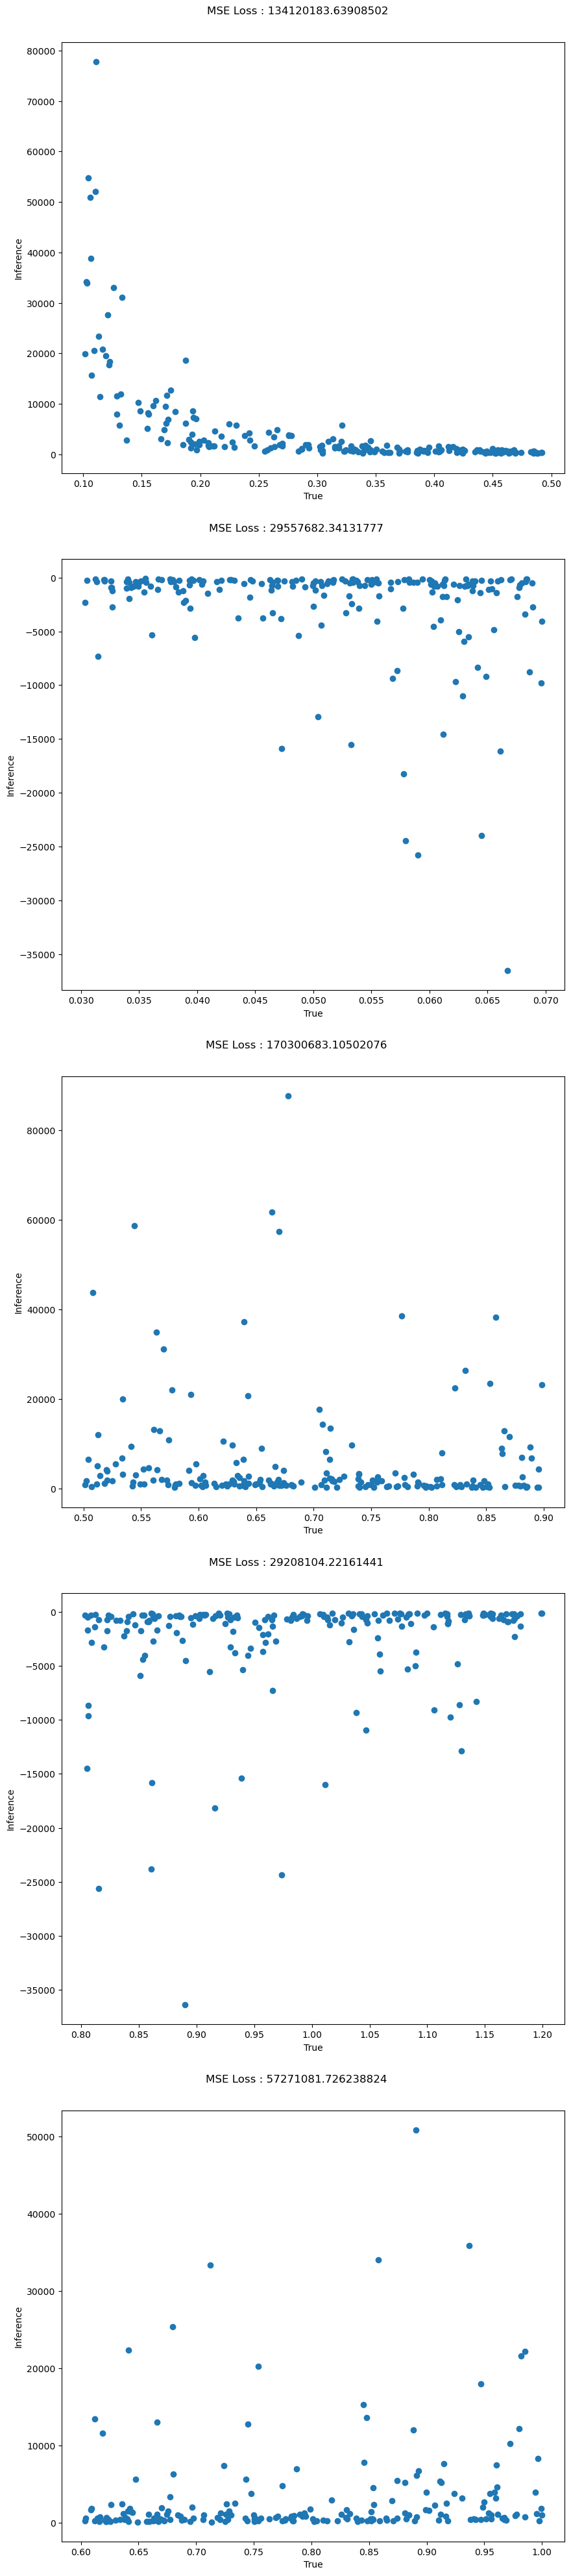

In [9]:
comparison_plot(modelpath,test_set,'test',save_path=savepath)

In [5]:
d,l=preprocess.PK_log(test_set['Density_Field'][:128],test_set[params][:128])

/home/anirban/Quijote/Anirban/funcs.py:327: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  img = torch.Tensor(img)


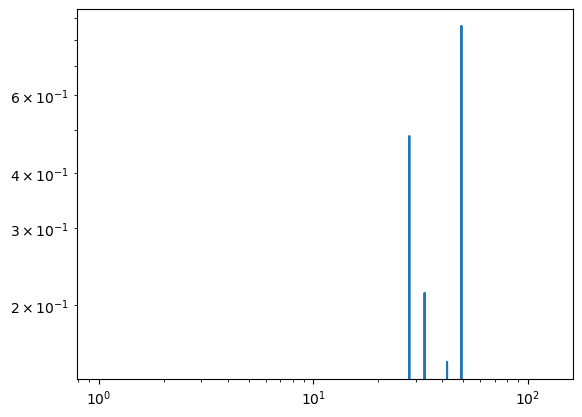

In [57]:
plt.loglog(d[0][0])

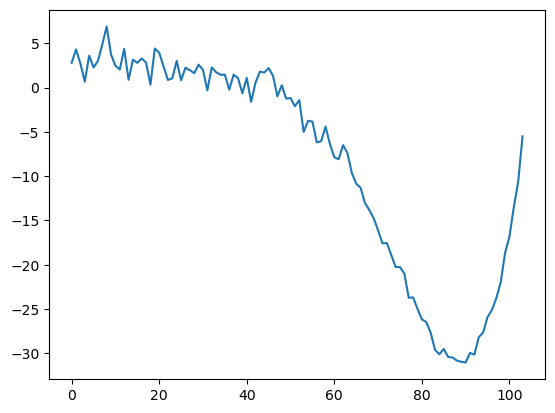

In [58]:
plt.plot(d[20][0][d[20][0]!=0])

In [59]:
d[10][0][d[0][0]!=0]

tensor([-2.0229e-01, -1.6494e+00, -1.0241e+00, -1.0125e+00, -1.7417e+00,
        -1.2888e+00, -1.2452e+00, -7.9585e-01, -1.3586e+00, -1.5028e+00,
        -3.6413e-02, -8.2784e-01, -2.2489e+00, -5.3139e-01, -1.4871e+00,
        -1.0426e+00, -2.3753e+00, -6.0008e-01, -1.1261e-01, -8.6772e-01,
        -1.5520e-01, -1.7774e+00, -5.6790e-01, -1.4963e+00,  4.9742e-01,
        -1.9850e+00, -1.9703e+00, -1.9332e+00,  1.1061e+00, -1.8502e+00,
        -1.9854e+00, -1.7019e+00, -7.4709e-01, -2.1990e+00, -1.0690e+00,
        -1.2676e+00, -3.4734e+00, -3.0564e-01, -6.3329e-01, -1.4033e+00,
         7.3184e-01,  1.2941e-01,  2.2170e-02,  3.6643e-01, -8.4757e-01,
         1.2487e+00,  1.9286e+00,  1.7787e+00,  4.3806e+00,  4.3183e+00,
         4.5114e+00,  2.7317e+00,  5.8950e+00,  4.1107e+00,  3.3613e+00,
         2.3001e+00,  2.1314e+00,  3.4390e+00,  5.3626e+00,  5.9957e+00,
         5.8897e+00,  7.1106e+00,  8.2197e+00,  9.9938e+00,  1.2024e+01,
         1.0973e+01,  9.8090e+00,  1.1940e+01,  1.1

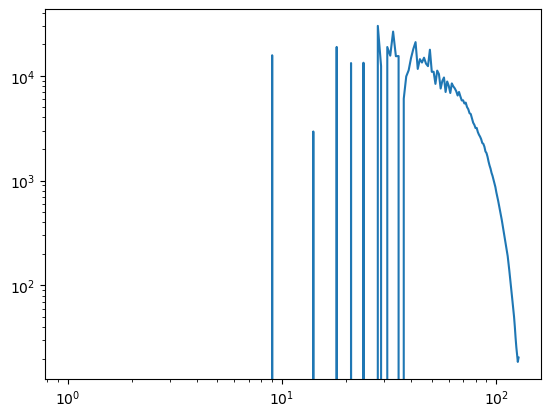

In [60]:
plt.loglog(np.load(test_set['Density_Field'][0]))

In [61]:
np.load(test_set['Density_Field'][20])

array([4.63740577e+04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.76178771e+04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.37454109e+04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.32154763e+04, 0.00000000e+00,
       0.00000000e+00, 5.00131488e+04, 0.00000000e+00, 0.00000000e+00,
       4.10676143e+04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.55041341e+04, 5.56366124e+04, 0.00000000e+00, 7.25187787e+04,
       5.01486280e+04, 5.31902800e+04, 3.74807513e+04, 4.38603885e+04,
       0.00000000e+00, 3.31710732e+04, 3.61167451e+04, 3.56979702e+04,
       3.51876853e+04, 3.24146541e+04, 2.19913635e+04, 3.56599027e+04,
       2.89918863e+04, 2.50290633e+04, 2.07186343e+04, 1.91400476e+04,
       2.39493075e+04, 1.76252898e+04, 1.87017568e+04, 1.82119316e+04,
       1.70634434e+04, 1.67384238e+04, 1.56405314e+04, 1.21320824e+04,
      

In [6]:
d.shape

torch.Size([128, 128])